IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

MOSTEFAI Nil

Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.

Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2023


<font size="+1" color="RED"><b>Date de rendu : lundi 22 mai 2023, avant 18h</b></font>
    
<b>Attention! le site Moodle ferme à 18h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...

Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données fournies dans le répertoire `data`.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive avec votre répertoire `iads/` contenant tous les fichiers nécessaires 
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: 
- Les fichiers de données ne doivent pas être inclus dans votre archive ! 
- Pensez à vérifier que votre archive contient bien tous les fichiers demandés et QUE les fichiers demandés.

## Soutenance des projets
La soutenance aura lieu le <font size="+1" color="RED">**mercredi 24 mai 2023**</font>, à partir de 14h. Un ordre de passage ainsi que la salle de TME où aura lieu les soutenances seront affichées sur le Moodle la veille.

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




**Très important** : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- data/
                  -- AGRIBALYSE3-ingredients.csv
                  -- AGRIBALYSE3-etapes.csv
                  -- AGRIBALYSE3-synthese.csv


Dans le notebook que vous rendrez, le chargement des fichiers de données considèrera donc cette arborescence.


# Les données Agribalyse (version 3.1)

Les données sont issues des données publiques du site de l'ADEME: https://agribalyse.ademe.fr/
Il est conseillé de parcourir la documentation de ces données sur le site ci-dessus pour se familiariser avec les différentes informations qu'elles fournissent.

Pour ce projet, vous travaillerez sur les données sur les produits alimentaires dont la version originale est visible ici : https://doc.agribalyse.fr/documentation/acces-donnees

Si vous n'arrivez pas à télécharger ou à ouvrir ce fichier, des versions de ce fichier au format libreoffice et au format Excel 97 sont fournies dans l'archive `data_tableur`. Il est conseillé de regarder un de ces fichiers car vous y trouverez des informations complémentaires sur les noms des colonnes des 3 fichiers CSV de `data` décrits ci-dessous.

Pour vous aider à manipuler les données nous vous fournissons dans l'archive `data` : les 3 tables du fichiers sont fournies sous la forme de 3 fichiers CSV directement lisibles par la commande `read_csv` de Pandas (le séparateur de colonnes est le `';'`). Ce sont ces 3 fichiers à utiliser dans votre notebook. Un exemple de chargement est donné plus loin dans ce notebook. Les fichiers sont:
- AGRIBALYSE3-ingredients.csv
- AGRIBALYSE3-etapes.csv
- AGRIBALYSE3-synthese.csv

**Remarque**: les données Agribalyse de 2021 ont fait l'objet du projet de l'an dernier, cette année c'est une nouvelle version étendue de ces données qui sont utilisées pour ce projet, nous attendons donc des analyses qui tirent partie des nouveautés de cette nouvelle version.

# Dépendances
- Libraire tqdm 

In [192]:
#Décommenter si vous n'avez pas installer tqdm
#! pip install tqdm

## Exemples

In [213]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

from iads import Classifiers as classif
from iads import Clustering as clust
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust
import graphviz as gv
import random
from tqdm import tqdm, trange
import time
import seaborn as sns
# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [214]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';') 
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))
print("Nombre de colonnes: ",len(data_synthese.columns))

Nombre de lignes:  2517
Nombre de colonnes:  29


In [215]:
for i in range(0,len(data_synthese.columns)):
    if i>10:
        print("col ",i,": ",data_synthese.columns[i], "\tmoyenne = ",data_synthese[data_synthese.columns[i]].mean())
    else:
        print("col ",i,": ",data_synthese.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d'aliment
col  3 :  Sous-groupe d'aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  code saison
col  7 :  code avion
col  8 :  Livraison
col  9 :  Matériau d'emballage
col  10 :  Préparation
col  11 :  DQR 	moyenne =  2.7681644815256274
col  12 :  Score unique EF 3.1 	moyenne =  0.6889596344855025
col  13 :  Changement climatique 	moyenne =  5.420519666269371
col  14 :  Appauvrissement de la couche d'ozone 	moyenne =  5.383361620977347e-07
col  15 :  Rayonnements ionisants 	moyenne =  1.0168216924910598
col  16 :  Formation photochimique d'ozone 	moyenne =  0.0216259181565355
col  17 :  Particules fines 	moyenne =  5.735583075089373e-07
col  18 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyenne =  1.0743762415574125e-07
col  19 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyenne =  3.885454350417177e-09
col  20 :  Acidification terrestre et ea

In [216]:
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';') 
data_etapes.columns
print("Nombre de lignes: ",len(data_etapes))
print("Nombre de colonnes: ",len(data_etapes.columns))

Nombre de lignes:  2517
Nombre de colonnes:  132


In [217]:
for i in range(0,len(data_etapes.columns)):
    print("col ",i,": ",data_etapes.columns[i])

col  0 :  Code AGB
col  1 :  Code CIQUAL
col  2 :  Groupe d aliment
col  3 :  Sous-groupe d aliment
col  4 :  Nom du Produit en Français
col  5 :  LCI Name
col  6 :  DQR
col  7 :  Nom et code
col  8 :  Agriculture
col  9 :  Transformation
col  10 :  Emballage
col  11 :  Transport
col  12 :  Supermarché et distribution
col  13 :  Consommation
col  14 :  Total
col  15 :  Agriculture.1
col  16 :  Transformation.1
col  17 :  Emballage.1
col  18 :  Transport.1
col  19 :  Supermarché et distribution.1
col  20 :  Consommation.1
col  21 :  Total.1
col  22 :  Agriculture.2
col  23 :  Transformation.2
col  24 :  Emballage.2
col  25 :  Transport.2
col  26 :  Supermarché et distribution.2
col  27 :  Consommation.2
col  28 :  Total.2
col  29 :  Agriculture.3
col  30 :  Transformation.3
col  31 :  Emballage.3
col  32 :  Transport.3
col  33 :  Supermarché et distribution.3
col  34 :  Consommation.3
col  35 :  Total.3
col  36 :  Agriculture.4
col  37 :  Transformation.4
col  38 :  Emballage.4
col  39 

In [218]:
print("Quelques infos :")
for i in range(0,17):
    print("----")
    for col in ['Agriculture', 'Transformation', 'Emballage', 'Transport', 'Supermarché et distribution', \
                'Consommation', 'Total']:
        if i>0:
            nom_col = col + "." +str(i)
        else:
            nom_col = col
        print(nom_col,"\tmoyenne = ",data_etapes[nom_col].mean())

Quelques infos :
----
Agriculture 	moyenne =  0.5684966870458406
Transformation 	moyenne =  0.056136918226633324
Emballage 	moyenne =  0.02242675546471597
Transport 	moyenne =  0.026165883152808857
Supermarché et distribution 	moyenne =  0.007877125406877268
Consommation 	moyenne =  0.007633790367775273
Total 	moyenne =  0.6887371596646522
----
Agriculture.1 	moyenne =  4.283405101720905
Transformation.1 	moyenne =  0.4956679004686108
Emballage.1 	moyenne =  0.25511460216686355
Transport.1 	moyenne =  0.31395988182510964
Supermarché et distribution.1 	moyenne =  0.03147132845606259
Consommation.1 	moyenne =  0.042848097985972104
Total.1 	moyenne =  5.422466912623518
----
Agriculture.2 	moyenne =  3.3849700977868863e-07
Transformation.2 	moyenne =  3.3468371653456784e-08
Emballage.2 	moyenne =  8.733627654263909e-08
Transport.2 	moyenne =  7.39595480802746e-08
Supermarché et distribution.2 	moyenne =  2.4693114096368837e-09
Consommation.2 	moyenne =  2.6369538328196176e-09
Total.2 	moye

In [219]:
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv",sep=";")
data_ingredients.columns
print("Nombre de lignes: ",len(data_ingredients))
print("Nombre de colonnes: ",len(data_ingredients.columns))

Nombre de lignes:  6856
Nombre de colonnes:  27


In [220]:
for i in range(0,len(data_ingredients.columns)):
    if i<10:
        print(i,": ", data_ingredients.columns[i])
    else:
        print(i,": ", data_ingredients.columns[i], \
              "\tmoyennne = ", data_ingredients[data_ingredients.columns[i]].mean())

0 :  Ciqual AGB
1 :  Ciqual code
2 :  Groupe d'aliment
3 :  Sous-groupe d'aliment
4 :  Nom Français
5 :  LCI Name
6 :  Ingredients
7 :  Code et Nom
8 :  Groupe
9 :  Sous-groupe
10 :  Formation photochimique d'ozone 	moyennne =  0.14901077587806696
11 :  Particules fines 	moyennne =  1.1694919040652145
12 :  Effets toxicologiques sur la santé humaine : substances non-cancérogènes 	moyennne =  9.663670448533415e-08
13 :  Effets toxicologiques sur la santé humaine : substances cancérogènes 	moyennne =  0.32177220746506924
14 :  Acidification terrestre et eaux douces 	moyennne =  0.0038680513541169905
15 :  Eutrophisation eaux douces 	moyennne =  1.1525166083035612e-07
16 :  Eutrophisation marine 	moyennne =  2.5530761424091244e-08
17 :  Eutrophisation terrestre 	moyennne =  9.025745752722709e-10
18 :  Écotoxicité pour écosystèmes aquatiques d'eau douce 	moyennne =  0.015834018204143707
19 :  Utilisation du sol 	moyennne =  0.0001705105635242942
20 :  Épuisement des ressources eau 	moyennn

# Projet

## Récuperation des datasets

In [221]:
data_synthese = pd.read_csv("data/AGRIBALYSE3-synthese.csv", sep=';')
data_etapes = pd.read_csv("data/AGRIBALYSE3-etapes.csv", sep=';')
data_ingredients = pd.read_csv("data/AGRIBALYSE3-ingredients.csv", sep=';')

In [222]:
data_synthese

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,Ambiant (long),Verre,...,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.520,12.70,0.000007
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,0,Ambiant (long),Pas d'emballage,...,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.020,6.23,0.000004
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,...,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.290,12.60,0.000005
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,6535,6535,"viandes, œufs, poissons",viandes crues,"Veau, steak haché 20% MG, cru","Veal, minced steak, 20% fat, raw",2,0,Glacé,PS,...,1.080000e-08,0.22500,0.002210,0.15600,0.96000,193.00,1520.0,6.280,111.00,0.000038
2513,6582,6582,"viandes, œufs, poissons",viandes cuites,"Veau, tête, bouillie/cuite à l'eau","Calf, head, boiled/cooked in water",2,0,Glacé,PS,...,1.120000e-08,0.23200,0.002300,0.16000,0.99000,200.00,1570.0,6.520,116.00,0.000041
2514,26146,26146,"viandes, œufs, poissons",poissons crus,"Vivaneau, cru","Snapper, raw",2,0,Glacé,PS,...,4.020000e-09,0.09540,0.000677,0.02250,0.24400,24.10,14.7,0.559,60.60,0.000163
2515,26147,26147,"viandes, œufs, poissons",poissons cuits,"Vivaneau, cuit","Snapper, cooked",2,0,Glacé,PP,...,5.000000e-09,0.11700,0.000867,0.02750,0.29900,29.30,18.7,0.643,86.30,0.000203


In [223]:
data_etapes

,Code AGB,Code CIQUAL,Groupe d aliment,Sous-groupe d aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Agriculture,Transformation,...,Emballage.16,Transport.16,Supermarché et distribution.16,Consommation.16,Total.16,DQR Overall,P,TiR,GR,TeR
0,11084,11084,aides culinaires et ingrédients divers,algues,Agar (algue). cru,Seaweed. agar. raw,2.99,Agar (algue). cru (11084),0.654812,0.500987,...,0.001043,0.000899,0.000460,0.000002,0.087558,2.99,3.51,1.32,4.33,2.79
1,11023,11023,aides culinaires et ingrédients divers,herbes,Ail séché. poudre,Garlic. powder. dried,4.11,Ail séché. poudre (11023),0.032661,0.000000,...,0.003464,0.000671,0.000440,0.000000,0.006605,4.11,4.27,4.39,2.79,5.00
2,11000,11000,aides culinaires et ingrédients divers,herbes,Ail. cru,Garlic. fresh,3.54,Ail. cru (11000),0.040826,0.000000,...,0.000000,0.000614,0.000550,0.000016,0.003717,3.54,2.74,4.28,2.80,4.34
3,11093,11093,aides culinaires et ingrédients divers,herbes,Aneth. frais,Dill. fresh,3.75,Aneth. frais (11093),0.082933,0.000000,...,0.001150,0.000583,0.000550,0.000016,0.004779,3.75,2.74,3.62,4.33,4.33
4,20995,20995,aides culinaires et ingrédients divers,algues,Ao-nori (Enteromorpha sp.). séchée ou déshydratée,Sea lettuce (Enteromorpha sp.). dried or dehyd...,2.99,Ao-nori (Enteromorpha sp.). séchée ou déshydra...,0.654812,0.500987,...,0.001043,0.000899,0.000460,0.000002,0.087558,2.99,3.51,1.32,4.33,2.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,6535,6535,viandes. œufs. poissons,viandes crues,Veau. steak haché 20% MG. cru,Veal. minced steak. 20% fat. raw,2.47,Veau. steak haché 20% MG. cru (6535),2.085451,0.045533,...,0.000034,0.000926,0.000914,0.000263,0.038303,2.47,3.77,2.02,2.01,2.08
2513,6582,6582,viandes. œufs. poissons,viandes cuites,Veau. tête. bouillie/cuite à l eau,Calf. head. boiled/cooked in water,2.45,Veau. tête. bouillie/cuite à l eau (6582),2.147376,0.010702,...,0.000053,0.001432,0.001443,0.002279,0.041251,2.45,3.66,1.28,2.04,2.82
2514,26146,26146,viandes. œufs. poissons,poissons crus,Vivaneau. cru,Snapper. raw,3.68,Vivaneau. cru (26146),0.719615,0.000000,...,0.000034,0.003652,0.000914,0.000263,0.163057,3.68,4.60,2.54,2.59,5.00
2515,26147,26147,viandes. œufs. poissons,poissons cuits,Vivaneau. cuit,Snapper. cooked,3.56,Vivaneau. cuit (26147),0.878692,0.000000,...,0.000939,0.004459,0.001116,0.003711,0.203390,3.56,4.30,2.62,2.34,5.00


In [224]:
data_ingredients

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
0,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Fromage frais crémeux,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.240000e-09,0.017200,0.000222,0.005420,0.072300,17.500000,90.100000,0.310000,8.090000,1.480000e-05
1,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Autres étapes,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,2.340000e-10,0.002160,0.000090,0.001300,0.006980,2.310000,9.060000,0.144000,15.300000,2.320000e-06
2,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Total,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.470000e-09,0.019300,0.000312,0.006730,0.079300,19.900000,99.200000,0.455000,23.400000,1.710000e-05
3,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Huile d'olive,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,4.180000e-10,0.003770,0.000052,0.001740,0.015800,5.580000,54.300000,1.950000,1.720000,1.890000e-06
4,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Oignons,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,1.370000e-11,0.000111,0.000003,0.000125,0.000408,0.231000,0.998000,0.165000,0.138000,1.520000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Viande,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.876827e-09,0.089629,0.000791,0.021372,0.385901,72.852216,283.404190,3.379838,60.658757,1.696759e-05
6852,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Lait demi-écremé,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,1.559162e-10,0.002703,0.000026,0.000870,0.011714,2.737303,14.705075,0.076615,0.695539,5.546857e-07
6853,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Farine de blé,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.501547e-10,0.003277,0.000048,0.002206,0.014150,4.221226,28.688275,0.095506,1.495995,9.948229e-07
6854,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Autres étapes,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.606422e-10,0.003243,0.000087,0.001362,0.008688,2.725231,4.999133,0.285816,32.821669,6.377483e-06


# Fonctions d'analyse

In [225]:
# Fonctions d'analyse
def analyse_knn(X, Y, dim = 2, k_max = 200, niterations = 10):
    """
    Effectue l'analyse du modèle knn en itérant sur les k.
    Retourne un dataframe composé:
    -D'une colonne Nombre de voisins
    -D'une colonne performance (pour la i-eme itération de la validation croisée)
    """
    index = np.random.permutation(len(X))
    X = X[index]
    Y = Y[index]
    df_res = pd.DataFrame(columns = ["Nombre de voisins", "Accuracy"])
    for k in trange(1, k_max, 2): # On ne prend que les valeurs impaires.
        for i in range(niterations):
            knn = classif.ClassifierKNN(dim, k)
            Xapp, Yapp, Xtest, Ytest = ut.crossval_strat(X, Y, niterations, i)
            knn.train(Xapp, Yapp)
            perf = knn.accuracy(Xtest, Ytest)
            df_res.loc[len(df_res)] = [k, perf]
    return df_res
    

    
    
def analyse_perceptron(X, Y, learning_rates , dim = 2,  niterations = 10, init = False):
    """
    Effectue l'analyse du perceptron pour différentes valeurs de learning_rate.
    Retourne un dataframe composé de:
    -Une colonne learning_rate
    -Une colonne performance (pour la i-eme iteration de la validation croisée)
    """
    niterations = 10
    seuil = 1e-4
    # Permutation pour la crossvalidation
    index = np.random.permutation(len(X))
    X = X[index]
    Y = Y[index]
    df_res = pd.DataFrame(columns = ["Learning rate", "Performance"])
    for learning_rate in tqdm(learning_rates):
        for i in range(niterations):
            perceptron = classif.ClassifierPerceptronBiais(dim, learning_rate, init)
            Xapp, Yapp, Xtest, Ytest = ut.crossval_strat(X, Y, niterations, i)
            perceptron.train(Xapp, Yapp)
            perf = perceptron.accuracy(Xtest, Ytest)
            df_res.loc[len(df_res)] = [learning_rate, perf]
    return df_res
    

def analyse_arbre_numerique(X, Y, seuils, dim = 2, niterations = 10):
    """
    Réalise l'analyse de l'arbre numérique pour différentes valeurs de epsilon
    Retourne un dataframe composé de:
    -Une colonne entropie
    -Une colonne accuracy
    """
    df_res = pd.DataFrame(columns = ["Entropie", "Accuracy"])
    for seuil in tqdm(seuils):
        for i in range(niterations):
            arbre = classif.ClassifierArbreNumerique(dim, seuil)
            Xapp, Yapp, Xtest, Ytest = ut.crossval_strat(X, Y, niterations, i)
            arbre.train(Xapp, Yapp)
            perf = arbre.accuracy(Xtest, Ytest)
            df_res.loc[len(df_res)] = [seuil ,perf]
    return df_res

    
def analyse_knnMC(X, Y, nb_classes, dim = 2, k_max = 200, niterations = 10):
    """
    Effectue l'analyse du modèle knn multiclasses en itérant sur les k.
    Retourne un dataframe composé:
    -D'une colonne Nombre de voisins
    -D'une colonne performance (pour la i-eme itération de la validation croisée)
    """
    index = np.random.permutation(len(X))
    X = X[index]
    Y = Y[index]
    df_res = pd.DataFrame(columns = ["Nombre de voisins", "Accuracy"])
    for k in trange(1, k_max, 2): # On ne prend que les valeurs impaires.
        for i in range(niterations):
            knn = classif.ClassifierKNN_MC(dim, k, nb_classes = nb_classes)
            Xapp, Yapp, Xtest, Ytest = ut.crossval_strat(X, Y, niterations, i)
            knn.train(Xapp, Yapp)
            perf = knn.accuracy(Xtest, Ytest)
            df_res.loc[len(df_res)] = [k, perf]
    return df_res

def plot_perfs(df_res):
    """
    Affiche le graphe des performances avec écart-type en fonction de la valeur de l'hyperparamètre
    """
    sns.set_theme(style="whitegrid")
    columns = df_res.columns
    sns.lineplot(x= columns[0], y= columns[1], data=df_res)

# Problématique 1 : prédire la qualité d'une donnée

La qualité d'une donnée est indiquée par la colonne DQR.

Il s'agit d'un score entre 1 et 5 tel que :
- Plus ce score est proche de 1, plus la donnée est fiable.
- Un score de >=3 indique que la donnée est "peu fiable" (cf. au site Agribalyse).

L'objectif est de pouvoir prédire, à partir d'une donnée X, sa fiabilité.

## Etape 1 : nettoyage du dataframe, et séparation base d'apprentissage-labels

Certains attributs ne nous seront d'aucune utilité (les noms par exemple, qui vont simplement ajouter trop de colonnes lors de la numérisation). Il faut également numériser les attributs discrets (groupe d'aliment...etc)

In [226]:
data_synthese

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
0,11084,11084,aides culinaires et ingrédients divers,algues,"Agar (algue), cru","Seaweed, agar, raw",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
1,11023,11023,aides culinaires et ingrédients divers,herbes,"Ail séché, poudre","Garlic, powder, dried",2,0,Ambiant (long),Verre,...,4.660000e-10,0.00622,0.000124,0.00232,0.01270,5.83,20.2,2.520,12.70,0.000007
2,11000,11000,aides culinaires et ingrédients divers,herbes,"Ail, cru","Garlic, fresh",2,0,Ambiant (long),Pas d'emballage,...,2.980000e-10,0.00200,0.000068,0.00212,0.00628,4.09,18.5,3.020,6.23,0.000004
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,...,6.190000e-10,0.00811,0.000203,0.00405,0.03120,5.68,36.4,5.290,12.60,0.000005
4,20995,20995,aides culinaires et ingrédients divers,algues,"Ao-nori (Enteromorpha sp.), séchée ou déshydratée","Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.12700,44.60,26.5,3.100,315.00,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,6535,6535,"viandes, œufs, poissons",viandes crues,"Veau, steak haché 20% MG, cru","Veal, minced steak, 20% fat, raw",2,0,Glacé,PS,...,1.080000e-08,0.22500,0.002210,0.15600,0.96000,193.00,1520.0,6.280,111.00,0.000038
2513,6582,6582,"viandes, œufs, poissons",viandes cuites,"Veau, tête, bouillie/cuite à l'eau","Calf, head, boiled/cooked in water",2,0,Glacé,PS,...,1.120000e-08,0.23200,0.002300,0.16000,0.99000,200.00,1570.0,6.520,116.00,0.000041
2514,26146,26146,"viandes, œufs, poissons",poissons crus,"Vivaneau, cru","Snapper, raw",2,0,Glacé,PS,...,4.020000e-09,0.09540,0.000677,0.02250,0.24400,24.10,14.7,0.559,60.60,0.000163
2515,26147,26147,"viandes, œufs, poissons",poissons cuits,"Vivaneau, cuit","Snapper, cooked",2,0,Glacé,PP,...,5.000000e-09,0.11700,0.000867,0.02750,0.29900,29.30,18.7,0.643,86.30,0.000203


In [227]:
# On supprime les colonnes inutiles
data_synthese_DQR = data_synthese.drop(columns = ["LCI Name", "Code CIQUAL", "Code AGB", "Nom du Produit en Français"])
# On récupère nos labels
Y = data_synthese_DQR["DQR"].to_numpy()
data_synthese_DQR.drop(columns = "DQR", inplace = True)
# On numérise les variables categorielles
data_synthese_DQR = pd.get_dummies(data_synthese_DQR)
X = data_synthese_DQR.to_numpy()
colonnes = data_synthese_DQR.columns

Il suffit maintenant de diviser notre univers des scores BQR en deux : 
- \< 3, que l'on considérera comme fiable (1)
- \>= 3, que l'on considérera comme non fiable (-1)

In [228]:
Y[Y < 3 ] = 1
Y[Y >= 3] = -1

## Etape 2 : apprentissage

### KNN

In [230]:
# Exemple d'utilisation de KNN pour k = 3
knn = classif.ClassifierKNN(len(colonnes), 11)
knn.train(X, Y)

In [231]:
randomIndex = random.randint(0, len(data_synthese_DQR))
x = X[randomIndex]
print("Exemple numéro ", randomIndex, " choisi : ", data_synthese.iloc[randomIndex]['Nom du Produit en Français'])
prediction = knn.predict(x)
print("Prediction : ", prediction, "")
print("Le score DQR réel : ", data_synthese.iloc[randomIndex]["DQR"], " => Vrai label = ", Y[randomIndex])


Exemple numéro  2045  choisi :  Crevette, crue
Prediction :  1 
Le score DQR réel :  3.59  => Vrai label =  -1.0


In [38]:
df_knn = analyse_knn(X, Y, dim = len(colonnes), k_max = 101)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:03<00:00,  4.87s/it]


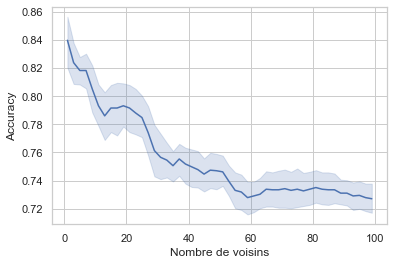

In [41]:
plot_perfs(df_knn)

KNN semble être assez efficace pour notre problème à k = 1.

### Perceptron biais

On se limitera à l'utilisation du perceptron biais (le perceptron étant trop instable).

In [232]:
# Exemple d'utilisation
perceptron = classif.ClassifierPerceptronBiais(len(colonnes), learning_rate = 0.001)


In [233]:
perceptron.train(X, Y)

array([1.27516323, 1.57626625, 1.37055276, 0.46775991, 0.87906258,
       0.80412008, 0.88197433, 1.00130541, 0.88530288, 1.28737714,
       1.57675028, 2.02405365, 1.22845416, 0.88730159, 1.52470017,
       1.09814068, 1.21411848, 1.16459259, 0.36132989, 0.9294502 ,
       0.8155856 , 0.46828756, 0.99200108, 1.05710947, 1.30414957,
       2.92872456, 2.22309978, 1.06413638, 0.62310643, 0.50734701,
       1.26941585, 1.35687942, 0.98052991, 1.23485817, 1.34306332,
       1.13423383, 1.63608069, 1.22795675, 1.21752538, 2.36236784,
       2.10718806, 0.48306211, 1.06274453, 1.42527054, 1.20317497,
       1.11284389, 1.09476669, 2.1174158 , 0.40302175, 0.62756071,
       1.56961958, 1.28221367, 0.65030747, 0.95113625, 0.65382764,
       0.66213749, 1.1482961 , 1.55882991, 1.98900989, 0.90816233,
       1.0345939 , 0.51024999, 3.20065296, 2.94283959, 0.3527144 ,
       0.7648453 , 0.41445923, 0.49645348, 1.01361573, 0.84395333,
       0.4923253 , 0.51674783, 1.08898453, 1.52066121, 4.51961

In [234]:
randomIndex = random.randint(0, len(data_synthese))
x = X[randomIndex]
print("Exemple numéro ", randomIndex, " choisi : ", data_synthese.iloc[randomIndex]["Nom du Produit en Français"])
prediction = perceptron.predict(x)
print("Prediction : ", prediction, "")
print("Le score DQR réel : ", data_synthese.iloc[randomIndex]["DQR"], " => Vrai label = ", Y[randomIndex])

Exemple numéro  1389  choisi :  Beurre à 60-62% MG, à teneur réduite en matière grasse, doux
Prediction :  -1 
Le score DQR réel :  3.65  => Vrai label =  -1.0


In [81]:
learning_rates = np.linspace(0, 1, 50)
df_perceptron = analyse_perceptron(X, Y, dim = len(colonnes), learning_rates = learning_rates)


100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [08:56<00:00, 10.73s/it]


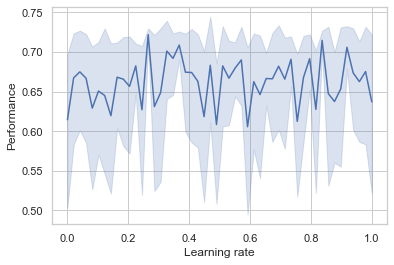

In [83]:
plot_perfs(df_perceptron)

In [96]:
perfs_moyennes = df_perceptron.groupby(["Learning rate"]).mean()

In [99]:
print("Meilleur learning_rate : ", perfs_moyennes.iloc[np.argmax(perfs_moyennes)])

Meilleur learning_rate :  Performance    0.721912
Name: 0.26530612244897955, dtype: float64


On constate que le perceptron biais n'est pas très bon pour prédire la fiabilité de la donnée (score d'accuracy faible et grand écart-type).

### Arbre numérique

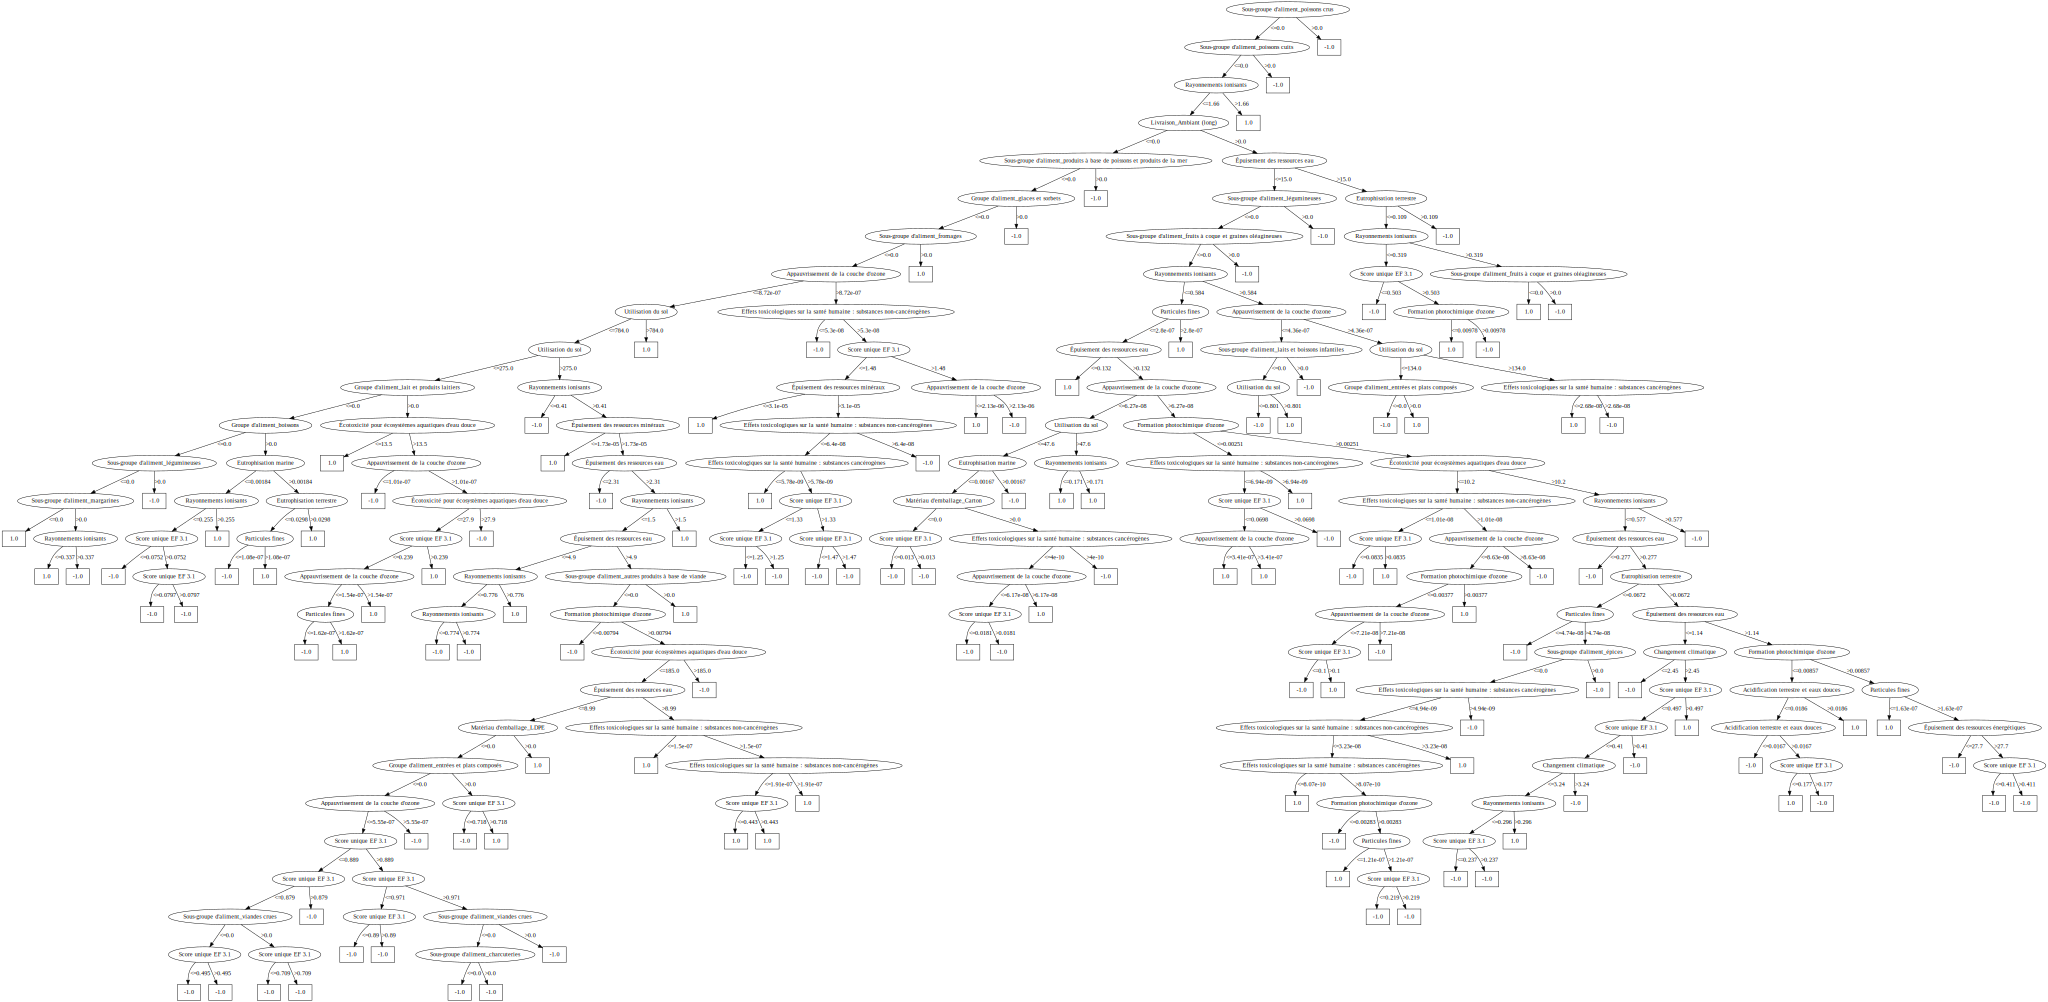

In [235]:
# Exemple d'utilisation de l'arbre numérique
arbreDecision = classif.ClassifierArbreNumerique(len(colonnes), 0.5,  colonnes)

# Construction de l'arbre de décision à partir du dataset Iris
arbreDecision.train(X,Y)

# Construction de la représentation graphique (affichage)
graphe_arbreDecision = gv.Digraph(format='png')
arbreDecision.affiche(graphe_arbreDecision)

# Affichage du graphe obtenu:
graphe_arbreDecision

In [236]:
randomIndex = random.randint(0, len(data_synthese))
x = X[randomIndex]
print("Exemple numéro ", randomIndex, " choisi : ", data_synthese.iloc[randomIndex]["Nom du Produit en Français"])
prediction = arbreDecision.predict(x)
print("Prediction : ", prediction, "")
print("Le score DQR réel : ", data_synthese.iloc[randomIndex]["DQR"], " => Vrai label = ", Y[randomIndex])

Exemple numéro  325  choisi :  Eau minérale Plancoet, embouteillée, gazeuse ou non gazeuse, faiblement minéralisée (Plancoet, 22)
Prediction :  1.0 
Le score DQR réel :  2.97  => Vrai label =  1.0


In [79]:
seuils = [0.1 + i * 0.1 for i in range(0, 11)]
df_arbre = analyse_arbre_numerique(X, Y, seuils, dim = len(colonnes), niterations = 3)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [05:29<00:00, 29.93s/it]


**Note** : La valeur niterations a été réduite pour pouvoir exécuter l'analyse plus rapidement.

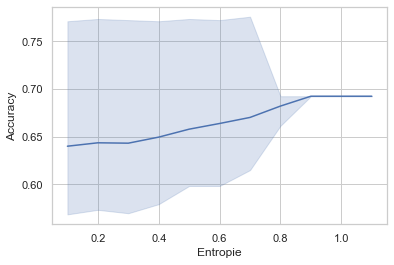

In [80]:
plot_perfs(df_arbre)

L'arbre numérique, en plus d'être très lent lors de l'apprentissage, ne semble pas du tout efficace (faible accuracy et grand écart-type).

### Comparaison des trois modèles avec les meilleurs hyperparamètres

On va comparer les trois modèles optimisés sur une base de train/test.

In [107]:
knn = classif.ClassifierKNN(len(colonnes), 1)
perceptron = classif.ClassifierPerceptron(len(colonnes),  0.2653)
arbre_numerique = classif.ClassifierArbreNumerique(len(colonnes), 0.9, colonnes)
classifieurs = {"knn": knn, "perceptron": perceptron, "arbre_numerique": arbre_numerique}
(X_train, Y_train), (X_test, Y_test) = ut.genere_train_test(X, Y, 1500, 600 )
for nom, classifieur in classifieurs.items():
    classifieur.train(X_train, Y_train)
    print("Accuracy sur la base de train pour ", nom, " : ", classifieur.accuracy(X_train, Y_train))
    print("Accuracy sur la base de test pour ", nom, " : ", classifieur.accuracy(X_test, Y_test))

Accuracy sur la base de train pour  knn  :  0.95
Accuracy sur la base de test pour  knn  :  0.8513189448441247
Accuracy sur la base de train pour  perceptron  :  0.621904761904762
Accuracy sur la base de test pour  perceptron  :  0.6402877697841727
Accuracy sur la base de train pour  arbre_numerique  :  0.7142857142857143
Accuracy sur la base de test pour  arbre_numerique  :  0.5827338129496403


- Le knn est de loin le meilleur algorithme pour estimer la fiabilité des données, même si le modèle semble avoir sur-appris (10 %  entre l'accuracy de train et l'accuracy de test).
- Le perceptron est mauvais, mais l'accuracy entre train et test varie peu.
- L'arbre numérique fait un score moyen sur la base de train (dû au sur-apprentissage), mais perd 13 % d'accuracy sur la base de test.

## Conclusion

Le knn avec k = 1 semble être le choix le plus optimal pour notre problème (et le moins coûteux en temps).

Il serait également intéressant de pouvoir intégrer de nouvelles données pour nos problématiques d'apprentissage supervisé.

# Problématique 2: prédire l'impact environnemental d'un produit

Le problème de notre première étude est que:
- L'on peut prédire que deux classes binaires (fiable et non fiable).
- L'on n'a pas mis à profit toute la base de donnée.

Pour le score environnemental, on distinguera 6 classes selon la valeur du score PEF (par ordre croissant d'impact):
- entre 0 et 0.28 (0)
- entre 0.25 et 0.43 (1)
- entre 0.43 et 0.75 (2)
- entre 0.75 et 1.5 (3)
- entre 1.5 et 3 (4)
- entre 3 et 6 (5.97 étant la valeur maximale dans la base de données) (5)

On va également utiliser le dataFrame des étapes pour affiner nos résultats.

Pour l'échelle de l'impact environnemental, je me suis appuyé sur cette documentation https://docs.score-environnemental.com/methodologie/acv .

Pour cette problématique, on utilisera que deux modèles:
- Le KNN (qui s'est révélé très performant).
- L'arbre numérique (Le perceptron n'ayant pas été implémenté pour un problème multiclasses).

## Etape 1 : Fusion des dataframes.

L'objectif est d'agréger de l'information: en plus des informations synthétiques obtenues grâce au dataframe de synthèse, on voudrait également avoir le détail sur chaque étape de fabrication du produit alimentaire.

In [237]:
data_PEF = pd.concat([data_synthese, data_etapes], join = "outer", axis = 1)

## Etape 2: Nettoyage des données et preparation des labels

In [238]:
# Supprimer les colonnes en double
data_PEF = data_PEF.loc[:,~data_PEF.columns.duplicated()].copy()
# Labels
Y = data_PEF["Score unique EF 3.1"].to_numpy()
# On supprime les colonnes inintéressantes, et les doublons (Groupe d aliment...)
data_PEF.drop(columns = ["Code AGB", "Code CIQUAL", "LCI Name", "Nom du Produit en Français", "Nom et code", "Groupe d aliment", "Sous-groupe d aliment", "DQR Overall"], inplace = True)
data_PEF = pd.get_dummies(data_PEF)
X = data_PEF.to_numpy()

In [239]:
# Preparation des classes
Y[Y < 0.28] = 0
Y[(Y >= 0.28) & (Y < 0.43)] = 1
Y[(Y >= 0.43) & (Y < 0.75)] = 2
Y[(Y >= 0.75) & (Y < 1.5)] = 3
Y[(Y >= 1.5) & (Y < 3)] = 4
Y[(Y >= 3) & (Y <= 6)] = 5

In [240]:
colonnes = data_PEF.columns

In [241]:
data_PEF

,code saison,code avion,DQR,Score unique EF 3.1,Changement climatique,Appauvrissement de la couche d'ozone,Rayonnements ionisants,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,...,Matériau d'emballage_Verre,Préparation_Cuisson à l'eau,Préparation_Four,Préparation_Four,Préparation_Friture,Préparation_Micro-onde,Préparation_Micro-onde,Préparation_Pas de préparation,Préparation_Poêle,Préparation_Réfrigéré chez le consommateur
0,2,0,2.99,1.2300,6.770,1.020000e-06,11.100,0.03890,7.170000e-07,7.440000e-08,...,0,0,0,0,0,0,0,1,0,0
1,2,0,4.11,0.1030,0.749,1.230000e-07,0.171,0.00293,8.250000e-08,1.170000e-08,...,1,0,0,0,0,0,0,1,0,0
2,2,0,3.54,0.0638,0.356,5.450000e-08,0.143,0.00107,2.330000e-08,7.450000e-09,...,0,0,0,0,0,0,0,1,0,0
3,2,0,3.75,0.1320,0.815,6.270000e-08,0.141,0.00256,6.900000e-08,1.200000e-08,...,0,0,0,0,0,0,0,1,0,0
4,2,0,2.99,1.2300,6.770,1.020000e-06,11.100,0.03890,7.170000e-07,7.440000e-08,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2,0,2.47,2.1800,22.400,7.120000e-07,1.870,0.04180,1.520000e-06,4.350000e-07,...,0,0,0,0,0,0,0,1,0,0
2513,2,0,2.45,2.2600,23.600,7.740000e-07,1.680,0.04380,1.570000e-06,4.500000e-07,...,0,1,0,0,0,0,0,0,0,0
2514,2,0,3.68,0.8160,4.250,7.760000e-07,0.425,0.06480,7.260000e-07,9.080000e-08,...,0,0,0,0,0,0,0,1,0,0
2515,2,0,3.56,1.0300,5.160,9.570000e-07,1.120,0.07900,8.870000e-07,1.140000e-07,...,0,0,1,0,0,0,0,0,0,0


## Etape 3 : Apprentissage

### KNN Multiclasses

In [242]:
# Exemple d'utilisation
knnMC = classif.ClassifierKNN_MC(len(colonnes), 3, 6)
knnMC.train(X, Y)


In [243]:
randomIndex = random.randint(0, len(data_PEF))
x = X[randomIndex]
print("Exemple numéro ", randomIndex, " choisi : ", data_synthese.iloc[randomIndex]["Nom du Produit en Français"])
prediction = knnMC.predict(x)
print("Prediction : ", prediction)
print("Le score PEF réel : ", data_synthese.iloc[randomIndex]["Score unique EF 3.1"], " => Vrai label = ", Y[randomIndex])

Exemple numéro  1960  choisi :  Bogue, crue
Prediction :  0.0
Le score PEF réel :  0.164  => Vrai label =  0.0


In [410]:
df_KNN_MC = analyse_knnMC(X, Y, dim = len(colonnes), k_max = 101, nb_classes = 6, niterations = 10)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [12:22<00:00, 14.85s/it]


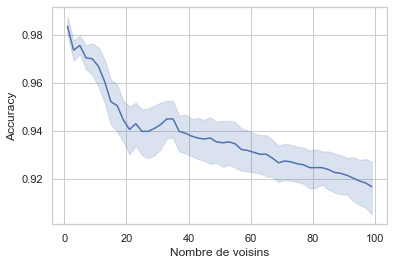

In [411]:
plot_perfs(df_KNN_MC)

On retiendra donc la valeur k = 1 pour le KNN Multiclasses.

Le modèle est globalement très bon.

### Arbre de décision

In [416]:
seuils = [0.1 + i * 0.1 for i in range(0, 11)]
df_arbre_numerique_MC = analyse_arbre_numerique(X, Y, seuils, len(colonnes), 3)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [05:15<00:00, 28.67s/it]


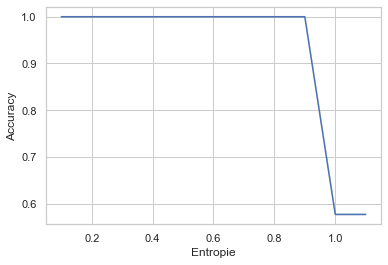

In [417]:
plot_perfs(df_arbre_numerique_MC)

L'arbre numérique semble être parfait pour notre problème.

L'accuracy de 1 provient probablement du fait que l'on entraîne l'arbre sur des données très précises (avec 319 attributs), il arrive forcément à faire les meilleures distinctions.

### Comparaison des deux modèles

In [447]:
def genere_train_test_MC(X, Y, proportion_test):
    """
    Réalisation d'une séparation train/test pour un problème multi-classes
    """
    sampling = np.random.permutation([i for i in range(len(X))])[0:proportion_test]
    X_test, Y_test = X[sampling], Y[sampling]
    X_train, Y_train = np.delete(X, sampling, axis = 0), np.delete(Y, sampling, axis = 0)
    return (X_train, Y_train), (X_test, Y_test)

In [449]:
knn_MC = classif.ClassifierKNN_MC(len(colonnes), nb_classes = 6, k = 1)
arbre_numerique_MC = classif.ClassifierArbreNumerique(len(colonnes), 0.25, colonnes)
classifieurs = {"knn_MC": knn_MC, "arbre_numerique_MC": arbre_numerique_MC}
(X_train, Y_train), (X_test, Y_test) = genere_train_test_MC(X, Y, 2000)
for nom, classifieur in classifieurs.items():
    classifieur.train(X_train, Y_train)
    print("Accuracy sur la base de train pour ", nom, " : ", classifieur.accuracy(X_train, Y_train))
    print("Accuracy sur la base de test pour ", nom, " : ", classifieur.accuracy(X_test, Y_test))

Accuracy sur la base de train pour  knn_MC  :  1.0
Accuracy sur la base de test pour  knn_MC  :  0.971
Accuracy sur la base de train pour  arbre_numerique_MC  :  1.0
Accuracy sur la base de test pour  arbre_numerique_MC  :  1.0


- Les deux modèles sont tous les deux performants.
- On peut privilégier l'arbre de décision au knn (puisqu'il fait une prédiction parfaite).
- Le knn reste néanmoins moins vorace en ressources.

## Conclusion

Cette problématique soulève des résultats intéressants :
les modèles sont capables d'estimer avec un taux de réussite quasi-parfait l'impact environnemental des produits alimentaires.
Le choix entre l'arbre de décision et le KNN multiclasses dans un contexte applicatif relève surtout d'un compromis : celui entre le stockage (le KNN stocke toute la base de donnée), et le temps (l'arbre de décision est beaucoup plus lent).


Mais comme l'arbre de décision réalise un score parfait, on aura tendance à le choisir pour nos prédictions.

# Problématique 3 : clustering

L'objectif de cette problématique est de trouver des clusters "intéressants" sur les ingrédients.

## Etape 1 : nettoyage du dataframe

In [195]:
data_ingredients

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
0,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Fromage frais crémeux,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.240000e-09,0.017200,0.000222,0.005420,0.072300,17.500000,90.100000,0.310000,8.090000,1.480000e-05
1,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Autres étapes,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,2.340000e-10,0.002160,0.000090,0.001300,0.006980,2.310000,9.060000,0.144000,15.300000,2.320000e-06
2,37000,37000,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza à la crème,cream sauce for pizza base,Total,Base de pizza à la crème (37000),aides culinaires et ingrédients divers,ingrédients divers,...,1.470000e-09,0.019300,0.000312,0.006730,0.079300,19.900000,99.200000,0.455000,23.400000,1.710000e-05
3,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Huile d'olive,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,4.180000e-10,0.003770,0.000052,0.001740,0.015800,5.580000,54.300000,1.950000,1.720000,1.890000e-06
4,37002,37002,aides culinaires et ingrédients divers,ingrédients divers,Base de pizza tomatée,Tomato sauce for pizza base,Oignons,Base de pizza tomatée (37002),aides culinaires et ingrédients divers,ingrédients divers,...,1.370000e-11,0.000111,0.000003,0.000125,0.000408,0.231000,0.998000,0.165000,0.138000,1.520000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Viande,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.876827e-09,0.089629,0.000791,0.021372,0.385901,72.852216,283.404190,3.379838,60.658757,1.696759e-05
6852,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Lait demi-écremé,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,1.559162e-10,0.002703,0.000026,0.000870,0.011714,2.737303,14.705075,0.076615,0.695539,5.546857e-07
6853,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Farine de blé,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.501547e-10,0.003277,0.000048,0.002206,0.014150,4.221226,28.688275,0.095506,1.495995,9.948229e-07
6854,25512,25512,"viandes, œufs, poissons",autres produits à base de viande,"Volaille, croquette panée ou nuggets",Poultry nuggets,Autres étapes,"Volaille, croquette panée ou nuggets (25512)","viandes, œufs, poissons",autres produits à base de viande,...,3.606422e-10,0.003243,0.000087,0.001362,0.008688,2.725231,4.999133,0.285816,32.821669,6.377483e-06


In [196]:
# Suppression des colonnes inintéressantes
data_ingredients_clustering = data_ingredients.drop(columns = ["Ciqual AGB", "Ciqual code", "Nom Français", "Code et Nom", "Groupe", "Ingredients", "Sous-groupe", "LCI Name"])

In [197]:
data_ingredients_clustering

,Groupe d'aliment,Sous-groupe d'aliment,Formation photochimique d'ozone,Particules fines,Effets toxicologiques sur la santé humaine : substances non-cancérogènes,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
0,aides culinaires et ingrédients divers,ingrédients divers,0.170000,1.580000,4.580000e-08,0.214000,0.002670,1.160000e-07,4.070000e-08,1.240000e-09,0.017200,0.000222,0.005420,0.072300,17.500000,90.100000,0.310000,8.090000,1.480000e-05
1,aides culinaires et ingrédients divers,ingrédients divers,0.060000,0.399000,5.950000e-08,0.516000,0.001090,2.810000e-08,7.160000e-09,2.340000e-10,0.002160,0.000090,0.001300,0.006980,2.310000,9.060000,0.144000,15.300000,2.320000e-06
2,aides culinaires et ingrédients divers,ingrédients divers,0.220000,1.980000,1.050000e-07,0.730000,0.003770,1.440000e-07,4.780000e-08,1.470000e-09,0.019300,0.000312,0.006730,0.079300,19.900000,99.200000,0.455000,23.400000,1.710000e-05
3,aides culinaires et ingrédients divers,ingrédients divers,0.050000,0.062100,1.760000e-08,0.011400,0.000890,2.640000e-08,2.050000e-08,4.180000e-10,0.003770,0.000052,0.001740,0.015800,5.580000,54.300000,1.950000,1.720000,1.890000e-06
4,aides culinaires et ingrédients divers,ingrédients divers,0.000000,0.009850,1.410000e-09,0.002390,0.000045,8.710000e-10,3.390000e-10,1.370000e-11,0.000111,0.000003,0.000125,0.000408,0.231000,0.998000,0.165000,0.138000,1.520000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,"viandes, œufs, poissons",autres produits à base de viande,0.679105,4.709130,6.309928e-07,1.946440,0.010133,6.372954e-07,6.388045e-08,3.876827e-09,0.089629,0.000791,0.021372,0.385901,72.852216,283.404190,3.379838,60.658757,1.696759e-05
6852,"viandes, œufs, poissons",autres produits à base de viande,0.022913,0.244032,6.640702e-09,0.012802,0.000387,1.832630e-08,5.749498e-09,1.559162e-10,0.002703,0.000026,0.000870,0.011714,2.737303,14.705075,0.076615,0.695539,5.546857e-07
6853,"viandes, œufs, poissons",autres produits à base de viande,0.029739,0.210754,1.347966e-08,0.021770,0.000640,2.122205e-08,2.674719e-09,3.501547e-10,0.003277,0.000048,0.002206,0.014150,4.221226,28.688275,0.095506,1.495995,9.948229e-07
6854,"viandes, œufs, poissons",autres produits à base de viande,0.105968,0.743885,7.816960e-08,1.147041,0.001974,3.511026e-08,9.382706e-09,3.606422e-10,0.003243,0.000087,0.001362,0.008688,2.725231,4.999133,0.285816,32.821669,6.377483e-06


In [198]:
data_ingredients_clustering = pd.get_dummies(data_ingredients_clustering)

## Etape 2 : test des différents algorithmes

### Clustering hierarchique

Le clustering hiérarchique permet d'avoir une idée rapide des clusters qu'il pourrait y'avoir dans le jeu de données.

Cependant cet algorithme est vraiment très lent. On va donc le tester sur un échantillon réduit.

In [66]:
sampling = np.random.permutation([i for i in range(len(data_ingredients_clustering))])[0:50]
data_ingredients_CHA = data_ingredients_clustering.iloc[sampling]

Distance minimale trouvée entre  [28, 32]  :  0.19399171806033638
Distance minimale trouvée entre  [29, 50]  :  0.32834155936066844
Distance minimale trouvée entre  [1, 51]  :  0.6647549101644038
Distance minimale trouvée entre  [16, 34]  :  1.5188974149978078
Distance minimale trouvée entre  [52, 53]  :  1.3668649731364308
Distance minimale trouvée entre  [31, 41]  :  1.6316303484416814
Distance minimale trouvée entre  [8, 20]  :  1.6530161199387254
Distance minimale trouvée entre  [54, 56]  :  2.0033662870087214
Distance minimale trouvée entre  [55, 57]  :  2.66337596470563
Distance minimale trouvée entre  [11, 18]  :  2.893564738600502
Distance minimale trouvée entre  [39, 59]  :  2.844102955375669
Distance minimale trouvée entre  [23, 43]  :  3.256695009985489
Distance minimale trouvée entre  [12, 13]  :  3.3978465368360466
Distance minimale trouvée entre  [33, 60]  :  4.012879210720676
Distance minimale trouvée entre  [24, 62]  :  4.371905924536193
Distance minimale trouvée entre 

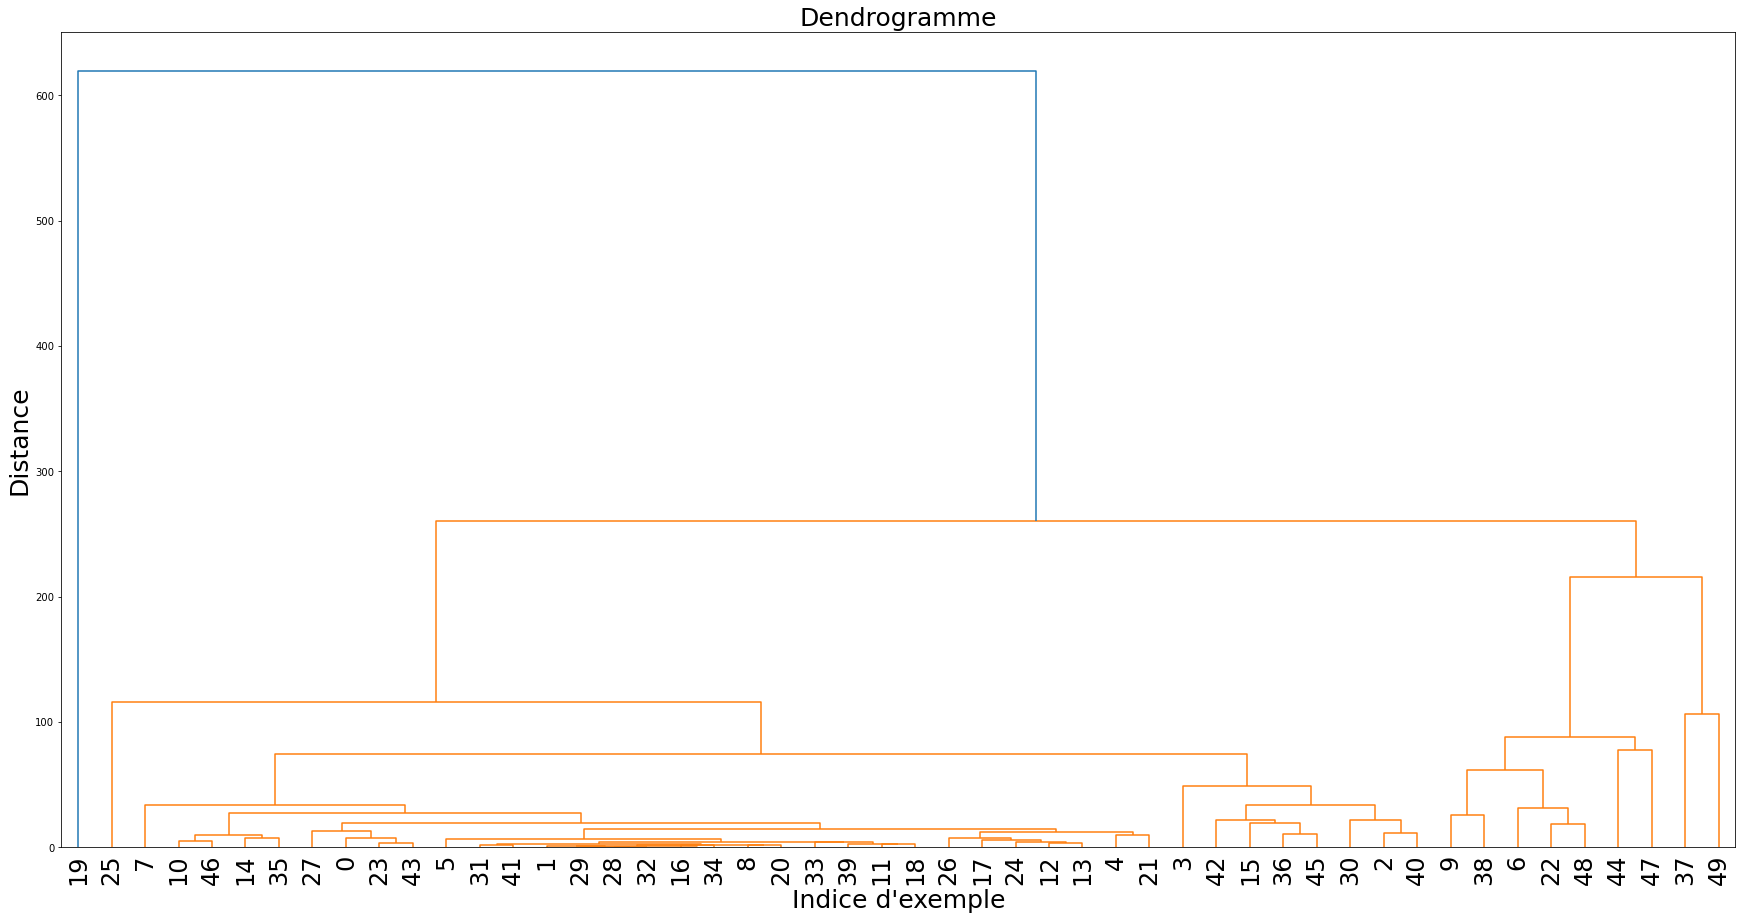

[[28, 32, 0.19399171806033638, 2],
 [29, 50, 0.32834155936066844, 3],
 [1, 51, 0.6647549101644038, 4],
 [16, 34, 1.5188974149978078, 2],
 [52, 53, 1.3668649731364308, 6],
 [31, 41, 1.6316303484416814, 2],
 [8, 20, 1.6530161199387254, 2],
 [54, 56, 2.0033662870087214, 8],
 [55, 57, 2.66337596470563, 10],
 [11, 18, 2.893564738600502, 2],
 [39, 59, 2.844102955375669, 3],
 [23, 43, 3.256695009985489, 2],
 [12, 13, 3.3978465368360466, 2],
 [33, 60, 4.012879210720676, 4],
 [24, 62, 4.371905924536193, 3],
 [58, 63, 4.558275268143168, 14],
 [10, 46, 4.785183933947752, 2],
 [17, 64, 6.138511470761183, 4],
 [5, 65, 6.258343893217295, 15],
 [0, 61, 7.556918312093526, 3],
 [14, 35, 7.566614064961746, 2],
 [26, 67, 7.697710120974833, 5],
 [66, 70, 9.633611991518926, 4],
 [4, 21, 10.095611263935679, 2],
 [36, 45, 10.329342610613056, 2],
 [2, 40, 11.44204666423391, 2],
 [71, 73, 12.317825826566308, 7],
 [27, 69, 12.88245423216284, 4],
 [68, 76, 14.488092858937785, 22],
 [22, 48, 18.445819298419202, 2

In [67]:
clust.CHA(data_ingredients_CHA, verbose=True,dendrogramme=True)

Distance minimale trouvée entre  [28, 32]  :  0.19399171806033638
Distance minimale trouvée entre  [29, 50]  :  0.2354896793743898
Distance minimale trouvée entre  [1, 51]  :  0.5013414269459324
Distance minimale trouvée entre  [16, 34]  :  1.5188974149978078
Distance minimale trouvée entre  [52, 53]  :  1.5504274535173153
Distance minimale trouvée entre  [31, 41]  :  1.6316303484416814
Distance minimale trouvée entre  [8, 20]  :  1.6530161199387254
Distance minimale trouvée entre  [54, 56]  :  2.0534857203654617
Distance minimale trouvée entre  [55, 57]  :  2.11380861814908
Distance minimale trouvée entre  [11, 18]  :  2.893564738600502
Distance minimale trouvée entre  [39, 59]  :  2.9563415464811276
Distance minimale trouvée entre  [58, 60]  :  3.1709186761166803
Distance minimale trouvée entre  [23, 43]  :  3.256695009985489
Distance minimale trouvée entre  [12, 13]  :  3.3978465368360466
Distance minimale trouvée entre  [33, 61]  :  3.5520360293247393
Distance minimale trouvée entr

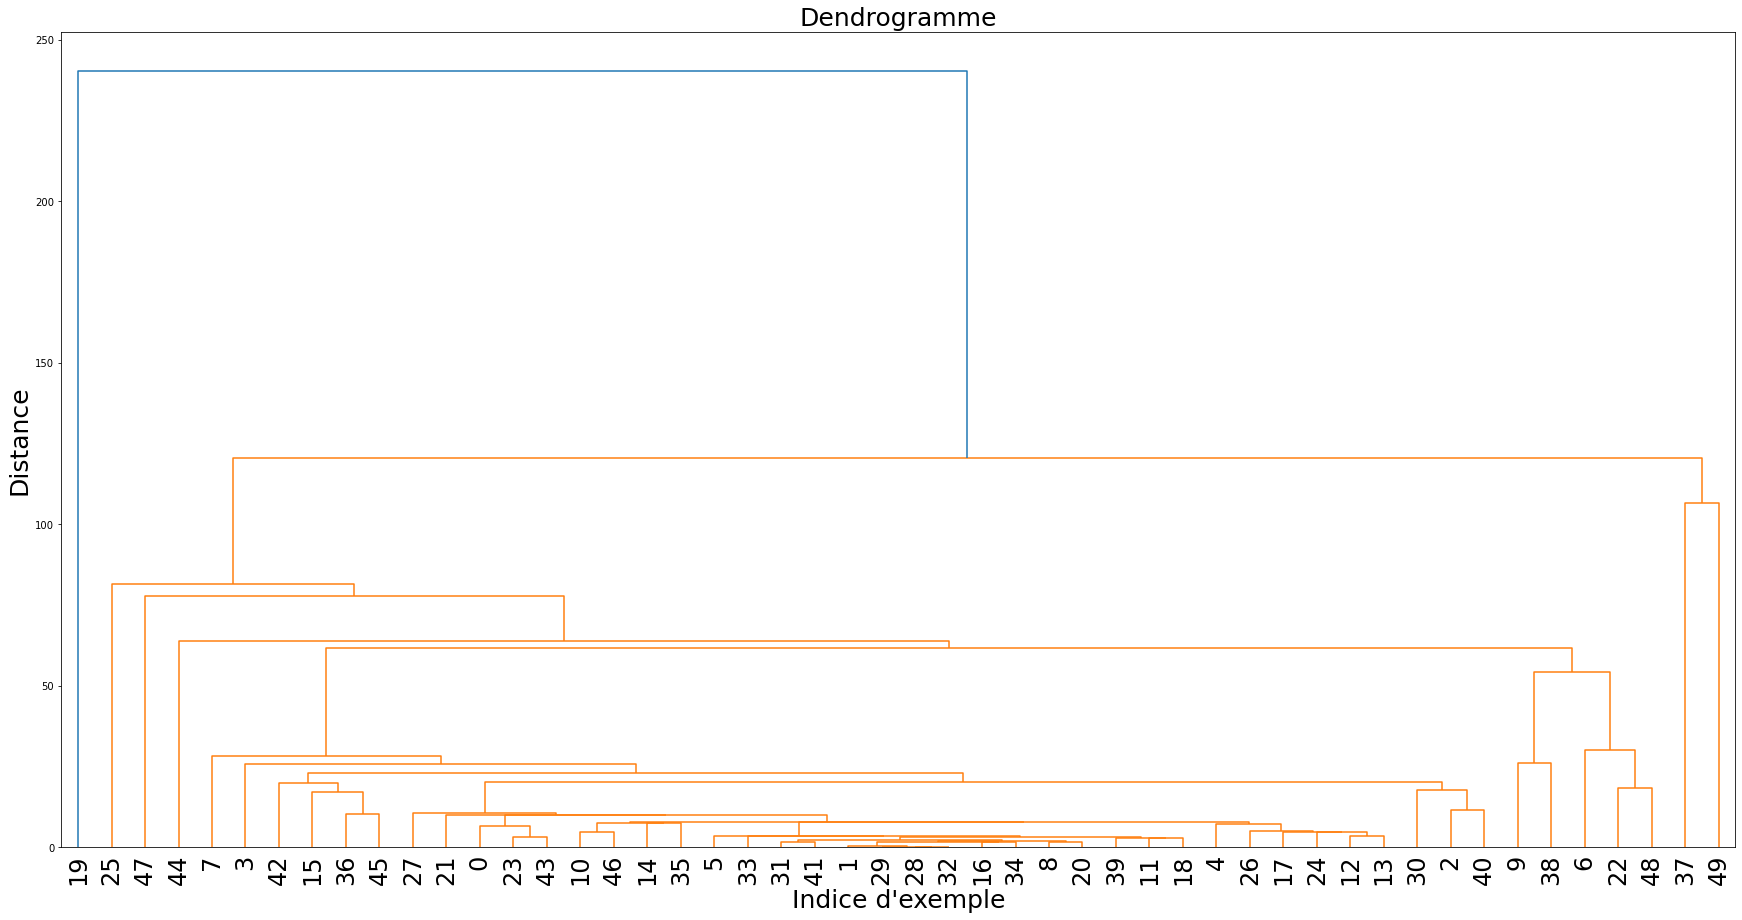

[[28, 32, 0.19399171806033638, 2],
 [29, 50, 0.2354896793743898, 3],
 [1, 51, 0.5013414269459324, 4],
 [16, 34, 1.5188974149978078, 2],
 [52, 53, 1.5504274535173153, 6],
 [31, 41, 1.6316303484416814, 2],
 [8, 20, 1.6530161199387254, 2],
 [54, 56, 2.0534857203654617, 8],
 [55, 57, 2.11380861814908, 10],
 [11, 18, 2.893564738600502, 2],
 [39, 59, 2.9563415464811276, 3],
 [58, 60, 3.1709186761166803, 13],
 [23, 43, 3.256695009985489, 2],
 [12, 13, 3.3978465368360466, 2],
 [33, 61, 3.5520360293247393, 14],
 [5, 64, 3.5939318646279372, 15],
 [24, 63, 4.596062739399631, 3],
 [17, 66, 4.658526383680113, 4],
 [10, 46, 4.785183933947752, 2],
 [26, 67, 5.196530658595779, 5],
 [0, 62, 6.655929614239716, 3],
 [4, 69, 7.278940993367379, 6],
 [14, 35, 7.566614064961746, 2],
 [68, 72, 7.581268267902766, 4],
 [65, 71, 7.743928327863328, 21],
 [73, 74, 7.766761836467831, 25],
 [70, 75, 9.863667652094287, 28],
 [21, 76, 10.095611263935679, 29],
 [36, 45, 10.329342610613056, 2],
 [27, 77, 10.557108012761

In [69]:
clust.CHA(data_ingredients_CHA, linkage = 'simple', verbose=True,dendrogramme=True)

Distance minimale trouvée entre  [28, 32]  :  0.19399171806033638
Distance minimale trouvée entre  [29, 50]  :  0.4230571633395874
Distance minimale trouvée entre  [1, 51]  :  0.8676316700051797
Distance minimale trouvée entre  [16, 34]  :  1.5188974149978078
Distance minimale trouvée entre  [31, 41]  :  1.6316303484416814
Distance minimale trouvée entre  [8, 20]  :  1.6530161199387254
Distance minimale trouvée entre  [52, 53]  :  1.6556140417903302
Distance minimale trouvée entre  [55, 56]  :  2.638822459327168
Distance minimale trouvée entre  [11, 18]  :  2.893564738600502
Distance minimale trouvée entre  [23, 43]  :  3.256695009985489
Distance minimale trouvée entre  [12, 13]  :  3.3978465368360466
Distance minimale trouvée entre  [39, 58]  :  3.409434901906606
Distance minimale trouvée entre  [54, 57]  :  4.2951650873511
Distance minimale trouvée entre  [24, 60]  :  4.782887272917484
Distance minimale trouvée entre  [10, 46]  :  4.785183933947752
Distance minimale trouvée entre  [3

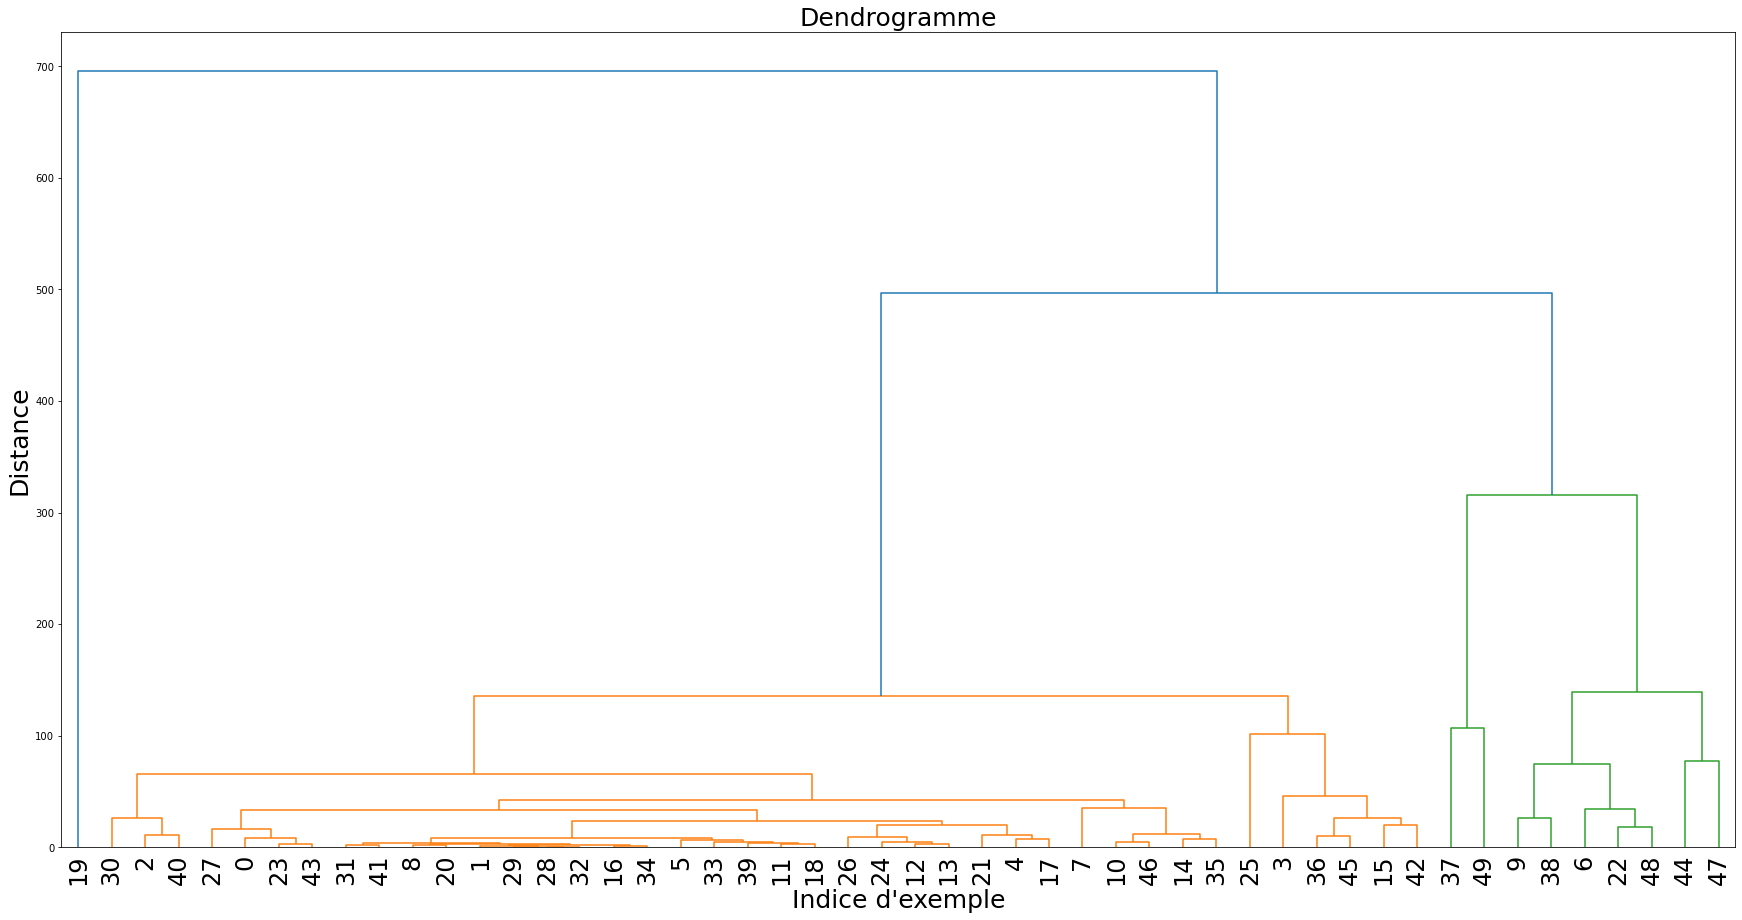

[[28, 32, 0.19399171806033638, 2],
 [29, 50, 0.4230571633395874, 3],
 [1, 51, 0.8676316700051797, 4],
 [16, 34, 1.5188974149978078, 2],
 [31, 41, 1.6316303484416814, 2],
 [8, 20, 1.6530161199387254, 2],
 [52, 53, 1.6556140417903302, 6],
 [55, 56, 2.638822459327168, 8],
 [11, 18, 2.893564738600502, 2],
 [23, 43, 3.256695009985489, 2],
 [12, 13, 3.3978465368360466, 2],
 [39, 58, 3.409434901906606, 3],
 [54, 57, 4.2951650873511, 10],
 [24, 60, 4.782887272917484, 3],
 [10, 46, 4.785183933947752, 2],
 [33, 61, 4.840527739423529, 4],
 [5, 65, 6.573007432558111, 5],
 [4, 17, 7.278940993367379, 2],
 [14, 35, 7.566614064961746, 2],
 [62, 66, 8.031528421094345, 15],
 [0, 59, 8.67269628867677, 3],
 [26, 63, 9.154211603781324, 4],
 [36, 45, 10.329342610613056, 2],
 [21, 67, 11.095222132341966, 3],
 [2, 40, 11.44204666423391, 2],
 [64, 68, 12.253123312778987, 4],
 [27, 70, 16.265966377132692, 4],
 [22, 48, 18.445819298419202, 2],
 [15, 42, 20.00696122874341, 2],
 [71, 73, 20.04740830196004, 7],
 [6

In [70]:
clust.CHA(data_ingredients_CHA, linkage = 'complete', verbose=True,dendrogramme=True)

Distance minimale trouvée entre  [28, 32]  :  0.19399171806033638
Distance minimale trouvée entre  [29, 50]  :  0.3292734213569886
Distance minimale trouvée entre  [1, 51]  :  0.6703487265868695
Distance minimale trouvée entre  [16, 34]  :  1.5188974149978078
Distance minimale trouvée entre  [52, 53]  :  1.5967588201879455
Distance minimale trouvée entre  [31, 41]  :  1.6316303484416814
Distance minimale trouvée entre  [8, 20]  :  1.6530161199387254
Distance minimale trouvée entre  [56, 54]  :  2.309566948510554
Distance minimale trouvée entre  [11, 18]  :  2.893564738600502
Distance minimale trouvée entre  [55, 57]  :  2.9794992036630688
Distance minimale trouvée entre  [39, 58]  :  3.1828882241938667
Distance minimale trouvée entre  [23, 43]  :  3.256695009985489
Distance minimale trouvée entre  [12, 13]  :  3.3978465368360466
Distance minimale trouvée entre  [33, 60]  :  4.355329645259803
Distance minimale trouvée entre  [24, 62]  :  4.689475006158558
Distance minimale trouvée entre

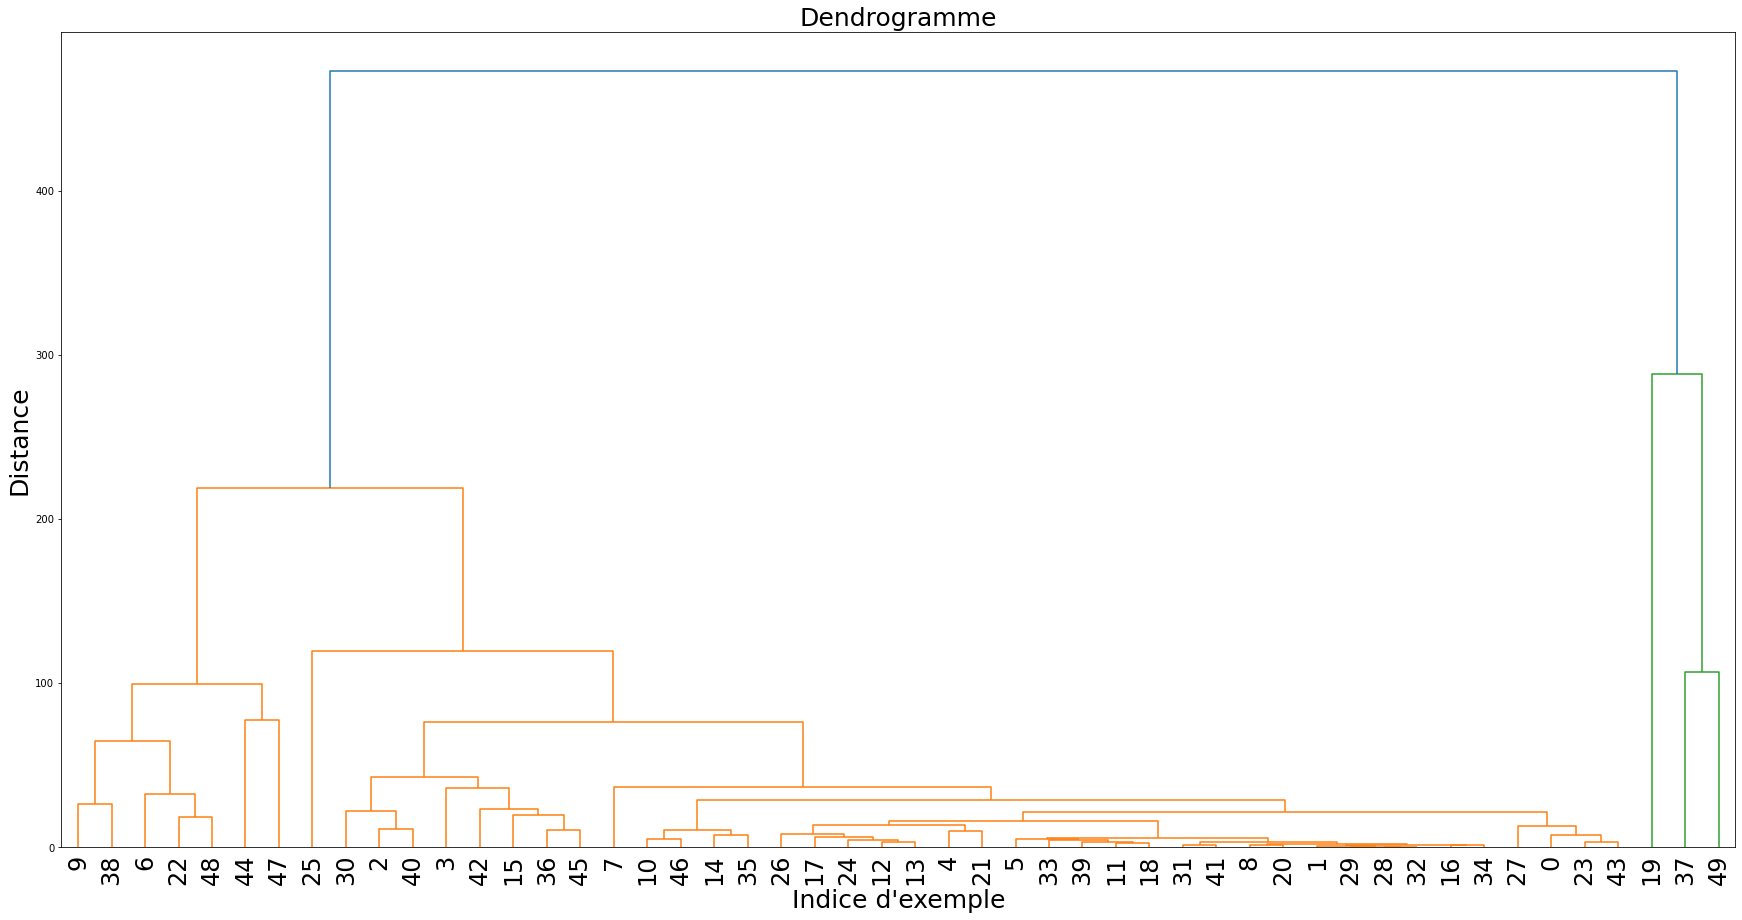

[[28, 32, 0.19399171806033638, 2],
 [29, 50, 0.3292734213569886, 3],
 [1, 51, 0.6703487265868695, 4],
 [16, 34, 1.5188974149978078, 2],
 [52, 53, 1.5967588201879455, 6],
 [31, 41, 1.6316303484416814, 2],
 [8, 20, 1.6530161199387254, 2],
 [56, 54, 2.309566948510554, 8],
 [11, 18, 2.893564738600502, 2],
 [55, 57, 2.9794992036630688, 10],
 [39, 58, 3.1828882241938667, 3],
 [23, 43, 3.256695009985489, 2],
 [12, 13, 3.3978465368360466, 2],
 [33, 60, 4.355329645259803, 4],
 [24, 62, 4.689475006158558, 3],
 [10, 46, 4.785183933947752, 2],
 [5, 63, 5.043297503637837, 5],
 [66, 59, 5.682348288340499, 15],
 [17, 64, 6.49099595464186, 4],
 [14, 35, 7.566614064961746, 2],
 [0, 61, 7.664312951458243, 3],
 [26, 68, 8.165284810425312, 5],
 [4, 21, 10.095611263935679, 2],
 [36, 45, 10.329342610613056, 2],
 [65, 69, 10.47556741590769, 4],
 [2, 40, 11.44204666423391, 2],
 [27, 70, 13.225532592391003, 4],
 [71, 72, 13.468748529975276, 7],
 [77, 67, 16.01276607033905, 22],
 [22, 48, 18.445819298419202, 2]

In [71]:
clust.CHA(data_ingredients_CHA, linkage = 'average', verbose=True,dendrogramme=True)

On constate que l'exemple 19 forme un cluster à lui tout seul (sûrement une anomalie, ou cela vient simplement du fait que l'on ait un petit échantillon de la base de données).

On peut compter plusieurs clusters, on essaira donc de determiner un bon nombre de clusters grâce au kppv.

### K plus proches voisins et évaluation des partitions

L'objectif est de pouvoir determiner un nombre de clusters optimal qui nous permettrait de prédire une certaine propriété (par exemple: à quel groupe d'aliment appartient l'exemple... etc).

In [9]:
print("Il y'a ", len(np.unique(data_ingredients["Groupe d'aliment"].to_numpy())), "groupes d'aliments.")
print("Il y'a ", len(np.unique(data_ingredients["Sous-groupe d'aliment"].to_numpy())), "sous-groupe d'aliments.")

Il y'a  11 groupes d'aliments.
Il y'a  47 sous-groupe d'aliments.


On s'attend à ce qu'il y'ait de bons clusters pour k = 11 ou k = 47.

In [12]:
# Exemple d'utilisation
tic = time.time()
centres, affectation = clust.kmoyennes(2, data_ingredients_clustering, 0.05, 100, verbose = True)
toc = time.time()
print("Durée : ", toc - tic)

Itération  1 : inertie = 381604238.405,  Différence = 381604237.355
Itération  2 : inertie = 333420422.157,  Différence = 48183816.248
Itération  3 : inertie = 299472220.106,  Différence = 33948202.051
Itération  4 : inertie = 276345656.590,  Différence = 23126563.516
Itération  5 : inertie = 255450053.275,  Différence = 20895603.315
Itération  6 : inertie = 230801437.327,  Différence = 24648615.948
Itération  7 : inertie = 211742894.838,  Différence = 19058542.489
Itération  8 : inertie = 206813409.897,  Différence = 4929484.942
Itération  9 : inertie = 204458475.143,  Différence = 2354934.754
Itération  10 : inertie = 203769887.283,  Différence = 688587.860
Itération  11 : inertie = 203686852.472,  Différence = 83034.811
Itération  12 : inertie = 203686852.472,  Différence = 0.000
Durée :  14.405238628387451


In [13]:
# Indice d'évaluation de dunn
ev.indice_dunn(affectation, data_ingredients_clustering)

6.032701978763381

In [14]:
# Indice d'évaluation de xie-beni
ev.indice_xie_beni(affectation, data_ingredients_clustering)

136818.8290878698

Comme on peut le constater, l'exécution des kmoyennes est extrêmement lente.

Je dois donc réduire la base de données.

In [199]:
nb_exemples = 2000
sampling = np.random.permutation(len(data_ingredients_clustering))[0:nb_exemples]
data_ingredients_clustering = data_ingredients_clustering.iloc[sampling]
data_ingredients_clustering_full = data_ingredients.iloc[sampling]

Pour jouer sur la performance du kmoyennes, on va jouer sur le nombre de clusters.

On ne va pas faire varier la valeur d'epsilon, puisqu'elle a peu d'impact, et que l'exécution est déjà assez lente.

In [32]:
def analyse_clusters(X, K_min = 2, K_max = 20, epsilon = 0.05):
    """
    Trace la courbe de l'inertie finale en fonction de la valeur de K
    """
    inerties = []
    inertie_init = clust.inertie_globale(X, {0: np.arange(0, len(X))})
    print(f"Inertie initiale : {inertie_init:.2f}")
    indices_dunn = []
    indices_xie_beni = []
    for K in tqdm(range(K_min, K_max)):
        centres, affectation = clust.kmoyennes(K, X, epsilon)
        inerties.append(clust.inertie_globale(X, affectation))
        indices_dunn.append(ev.indice_dunn(affectation, X))
        indices_xie_beni.append(ev.indice_xie_beni(affectation, X))
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Inertie globale")
    plt.title("Courbe de l'inertie globale en fonction du nombre de clusters")
    plt.xticks(range(K_min, K_max))
    plt.plot(range(K_min,K_max), inerties)
    plt.show()
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Indice de Dunn")
    plt.title("Indice de Dunn en fonction du nombre de clusters")
    plt.xticks(range(K_min, K_max))
    plt.plot(range(K_min, K_max), indices_dunn)
    plt.show()
    plt.xlabel("Nombre de clusters")
    plt.ylabel("Indice de Xie-Beni")
    plt.title("Indice de Xie-Beni en fonction du nombre de clusters")
    plt.xticks(range(K_min, K_max))
    plt.plot(range(K_min, K_max), indices_xie_beni)
    plt.show()

Inertie initiale : 107062118.97


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [05:38<00:00, 18.81s/it]


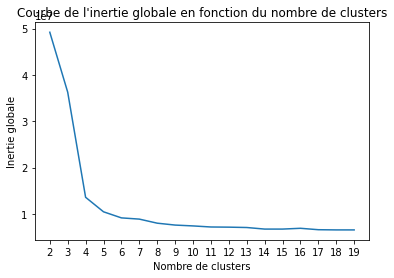

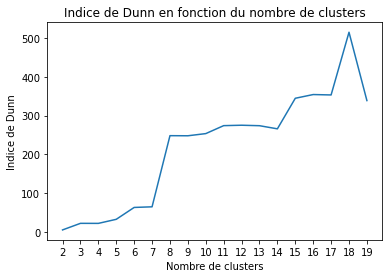

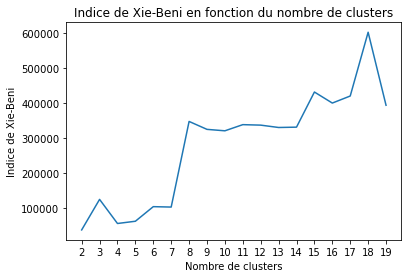

In [33]:
analyse_clusters(data_ingredients_clustering, K_max = 20)

- L'inertie globale est une mesure de la compacité intra-cluster (densité autour du centroide) => critère d'homogenéité des clusters.
- L'indice de dunn et l'indice de xie-beni sont deux indices évaluant la qualité d'une partition. Plus ces indices sont faibles, plus la partition est de bonne qualité.

Les indexs prennent en compte les distances inter-clusters (la séparabilité) qu'il faut maximiser.

Constats:
- On constate qu'à partir de k = 8, les partitions sont plutôt mauvaises.
On donc un choix de k entre 2 et 7.

k = 2 semble être le meilleur choix.

In [39]:
centres, affectation = clust.kmoyennes(2, data_ingredients_clustering, 0.001, 1000, verbose = True)

Itération  1 : inertie = 95608733.827,  Différence = 95608732.826
Itération  2 : inertie = 80981339.880,  Différence = 14627393.947
Itération  3 : inertie = 71714637.698,  Différence = 9266702.181
Itération  4 : inertie = 64779714.863,  Différence = 6934922.836
Itération  5 : inertie = 57584626.709,  Différence = 7195088.154
Itération  6 : inertie = 52235444.583,  Différence = 5349182.126
Itération  7 : inertie = 49787905.542,  Différence = 2447539.040
Itération  8 : inertie = 49397908.080,  Différence = 389997.462
Itération  9 : inertie = 49331040.491,  Différence = 66867.589
Itération  10 : inertie = 49261516.079,  Différence = 69524.412
Itération  11 : inertie = 49236350.815,  Différence = 25165.264
Itération  12 : inertie = 49216862.373,  Différence = 19488.441
Itération  13 : inertie = 49216862.373,  Différence = 0.000


Le clustering nous a doté de deux classes, il serait intéressant de voir quelles sont les significations de ces classes.

In [ ]:
data_ingredients

In [65]:
data_ingredients_clustering_full.iloc[affectation[0]]

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
5191,23852,23852,produits céréaliers,gâteaux et pâtisseries,Gaufre moelleuse (type bruxelloise ou liégeois...,"Soft waffle (Brussels-style), with chocolate, ...",Total,Gaufre moelleuse (type bruxelloise ou liégeois...,produits céréaliers,gâteaux et pâtisseries,...,3.480400e-09,0.030711,0.000606,0.016852,0.127194,32.087174,244.330381,1.531037,32.482684,9.265788e-06
5151,23007,23007,produits céréaliers,gâteaux et pâtisseries,"Gâteau mousse de fruits sur génoise, type miro...",Sponge cake w fruit mousse,Sucre blanc,"Gâteau mousse de fruits sur génoise, type miro...",produits céréaliers,gâteaux et pâtisseries,...,7.086953e-11,0.002789,0.000023,0.000892,0.011895,1.382166,5.296278,0.366561,0.869717,7.166673e-07
5674,7001,7001,produits céréaliers,pains et viennoiseries,"Pain, baguette, courante","Bread, French bread, baguette",Total,"Pain, baguette, courante (7001)",produits céréaliers,pains et viennoiseries,...,8.493654e-10,0.007990,0.000158,0.005308,0.032847,9.727010,64.244255,0.291764,15.296748,3.379973e-06
2333,25088,25088,entrées et plats composés,plats composés,Riz cantonais,Cantonese rice,Total,Riz cantonais (25088),entrées et plats composés,plats composés,...,2.088766e-09,0.036566,0.000478,0.014944,0.151838,43.068449,129.964642,21.626664,39.944326,1.277068e-05
6782,25598,25598,"viandes, œufs, poissons",substituts de viande,"Seitan, préemballé",Seitan,Farine de blé,"Seitan, préemballé (25598)","viandes, œufs, poissons",substituts de viande,...,9.907320e-11,0.000927,0.000014,0.000624,0.004003,1.194359,8.117095,0.027022,0.423279,2.814764e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,25001,25001,entrées et plats composés,plats composés,Blanquette de veau,Veal stew in white sauce,Beurre,Blanquette de veau (25001),entrées et plats composés,plats composés,...,1.581898e-10,0.002740,0.000027,0.000885,0.011905,2.766506,14.919580,0.078624,0.728758,6.450584e-07
5083,23803,23803,produits céréaliers,gâteaux et pâtisseries,"Gâteau basque, cerises","Basque cake (shortbread), with cherries",Lait demi-écremé,"Gâteau basque, cerises (23803)",produits céréaliers,gâteaux et pâtisseries,...,2.804688e-10,0.004862,0.000047,0.001565,0.021072,4.923978,26.452116,0.137819,1.251165,9.977923e-07
3000,26267,26267,entrées et plats composés,"pizzas, tartes et crêpes salées",Tarte épinard chèvre,Goat cheese and spinach tart,Autres étapes,Tarte épinard chèvre (26267),entrées et plats composés,"pizzas, tartes et crêpes salées",...,3.803010e-10,0.003083,0.000128,0.001514,0.009229,2.956690,9.474710,0.178444,29.928785,6.871280e-06
4587,23909,23909,produits céréaliers,gâteaux et pâtisseries,Cake aux fruits,Fruit cake,Sucre blanc,Cake aux fruits (23909),produits céréaliers,gâteaux et pâtisseries,...,7.468885e-11,0.002939,0.000024,0.000940,0.012536,1.456654,5.581707,0.386316,0.916587,7.552901e-07


In [66]:
data_ingredients_clustering_full.iloc[affectation[1]]

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
1575,25413,25413,entrées et plats composés,sandwichs,"Hamburger, provenant de fast food","Hamburger, from fast foods restaurant",Bœuf haché,"Hamburger, provenant de fast food (25413)",entrées et plats composés,sandwichs,...,7.785299e-09,0.223237,0.000946,0.050464,0.985043,76.760765,1139.921900,3.421097,42.025404,0.000028
1886,25158,25158,entrées et plats composés,plats composés,"Pâtes fraîches farcies (ex : raviolis), à la v...","Fresh pasta, stuffed with meat (e.g. bolognese...",Total,"Pâtes fraîches farcies (ex : raviolis), à la v...",entrées et plats composés,plats composés,...,7.710940e-09,0.200057,0.001131,0.047807,0.876680,89.018365,980.653313,4.225120,60.907844,0.000030
6388,30153,30153,"viandes, œufs, poissons",charcuteries,"Merguez, porc et bœuf, crue","Merguez sausage, pork and beef, raw",Viande de bœuf sans os,"Merguez, porc et bœuf, crue (30153)","viandes, œufs, poissons",charcuteries,...,7.724129e-09,0.222747,0.000933,0.050356,0.983486,76.992624,1137.906000,3.381740,35.634330,0.000028
2554,25429,25429,entrées et plats composés,sandwichs,"Sandwich grec ou Kebab, baguette, crudités","Sandwich made with French bread, kebab and raw...",Total,"Sandwich grec ou Kebab, baguette, crudités (25...",entrées et plats composés,sandwichs,...,6.745975e-09,0.203438,0.000938,0.047006,0.895733,60.758981,1236.690323,4.813787,50.146088,0.000023
6846,25173,25173,"viandes, œufs, poissons",autres produits à base de viande,"Veau, escalope panée, cuite","Veal, bread escalope, cooked",Viande de veau sans os,"Veau, escalope panée, cuite (25173)","viandes, œufs, poissons",autres produits à base de viande,...,8.393220e-09,0.176721,0.001711,0.123012,0.758532,152.199420,1204.751700,4.781234,69.131957,0.000028
6369,30155,30155,"viandes, œufs, poissons",charcuteries,"Merguez, boeuf et mouton, cuite","Merguez sausage, beef and mutton, cooked",Viande de moutton sans os,"Merguez, boeuf et mouton, cuite (30155)","viandes, œufs, poissons",charcuteries,...,1.034671e-08,0.346481,0.001298,0.075399,1.534282,90.085574,2104.502200,6.063079,44.675831,0.000028
3087,8612,8612,entrées et plats composés,plats composés,Tripes à la tomate ou à la provençale,Provencal-type tripe (with tomato),Total,Tripes à la tomate ou à la provençale (8612),entrées et plats composés,plats composés,...,1.006825e-08,0.282468,0.001253,0.064756,1.243045,100.306311,1428.488948,5.043561,69.404477,0.000040
6381,30154,30154,"viandes, œufs, poissons",charcuteries,"Merguez, bœuf, mouton et porc, crue","Merguez sausage, beef, mutton and pork, raw",Total,"Merguez, bœuf, mouton et porc, crue (30154)","viandes, œufs, poissons",charcuteries,...,3.508308e-08,1.073686,0.004357,0.239264,4.739133,328.671349,5975.958551,17.935573,189.348747,0.000119
6375,30154,30154,"viandes, œufs, poissons",charcuteries,"Merguez, bœuf, mouton et porc, crue","Merguez sausage, beef, mutton and pork, raw",Viande de bœuf sans os,"Merguez, bœuf, mouton et porc, crue (30154)","viandes, œufs, poissons",charcuteries,...,7.724129e-09,0.222747,0.000933,0.050356,0.983486,76.992624,1137.906000,3.381740,35.634330,0.000028
1151,25111,25111,entrées et plats composés,plats composés,Chili con carne,Chili con carne,Total,Chili con carne (25111),entrées et plats composés,plats composés,...,9.214225e-09,0.252294,0.001156,0.058928,1.109108,90.535529,1289.226545,4.916897,71.322391,0.000037


Il semblerait que le KNN ait séparé notre data en deux groupes:
- Le groupe des ingrédients ayant un grand impact sur l'environnement (1), avec des valeurs très elevées dans certaines colonnes, notamment les colonnes MJ/kg de produit, Pt/kg de produit, Epuisement des ressources energétiques, Formation photochimique d'ozone ... etc
- Le groupe des ingrédients avec un impact plus faible sur l'environnement.

Il serait également intéressant de tester l'algorithme avec un nombre de clusters égal au nombre de groupes ou sous-groupes d'aliments.

In [67]:
print("Il y'a ", len(np.unique(data_ingredients_clustering_full["Groupe d'aliment"].to_numpy())), "groupes d'aliments.")
print("Il y'a ", len(np.unique(data_ingredients_clustering_full["Sous-groupe d'aliment"].to_numpy())), "sous-groupe d'aliments.")

Il y'a  11 groupes d'aliments.
Il y'a  47 sous-groupe d'aliments.


In [68]:
centres, affectation = clust.kmoyennes(47, data_ingredients_clustering, 0.001, 1000, verbose = True)
print("Pour k = 47, xie-beni = ", ev.indice_xie_beni(affectation, data_ingredients_clustering))
print("Pour k = 47, dunn = ", ev.indice_dunn(affectation, data_ingredients_clustering))

Itération  1 : inertie = 29095951.781,  Différence = 29095950.780
Itération  2 : inertie = 26087886.466,  Différence = 3008065.316
Itération  3 : inertie = 18370239.302,  Différence = 7717647.163
Itération  4 : inertie = 11725043.837,  Différence = 6645195.465
Itération  5 : inertie = 9480242.002,  Différence = 2244801.835
Itération  6 : inertie = 6716115.401,  Différence = 2764126.602
Itération  7 : inertie = 6572438.354,  Différence = 143677.047
Itération  8 : inertie = 6426243.838,  Différence = 146194.516
Itération  9 : inertie = 6352371.448,  Différence = 73872.390
Itération  10 : inertie = 6316531.531,  Différence = 35839.918
Itération  11 : inertie = 6303701.049,  Différence = 12830.482
Itération  12 : inertie = 6292855.452,  Différence = 10845.597
Itération  13 : inertie = 6266233.449,  Différence = 26622.003
Itération  14 : inertie = 6244294.704,  Différence = 21938.744
Itération  15 : inertie = 6199033.550,  Différence = 45261.154
Itération  16 : inertie = 6157891.377,  Diffé

In [69]:
data_ingredients_clustering_full.iloc[affectation[1]]

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
1575,25413,25413,entrées et plats composés,sandwichs,"Hamburger, provenant de fast food","Hamburger, from fast foods restaurant",Bœuf haché,"Hamburger, provenant de fast food (25413)",entrées et plats composés,sandwichs,...,7.785299e-09,0.223237,0.000946,0.050464,0.985043,76.760765,1139.921900,3.421097,42.025404,0.000028
6388,30153,30153,"viandes, œufs, poissons",charcuteries,"Merguez, porc et bœuf, crue","Merguez sausage, pork and beef, raw",Viande de bœuf sans os,"Merguez, porc et bœuf, crue (30153)","viandes, œufs, poissons",charcuteries,...,7.724129e-09,0.222747,0.000933,0.050356,0.983486,76.992624,1137.906000,3.381740,35.634330,0.000028
2554,25429,25429,entrées et plats composés,sandwichs,"Sandwich grec ou Kebab, baguette, crudités","Sandwich made with French bread, kebab and raw...",Total,"Sandwich grec ou Kebab, baguette, crudités (25...",entrées et plats composés,sandwichs,...,6.745975e-09,0.203438,0.000938,0.047006,0.895733,60.758981,1236.690323,4.813787,50.146088,0.000023
6846,25173,25173,"viandes, œufs, poissons",autres produits à base de viande,"Veau, escalope panée, cuite","Veal, bread escalope, cooked",Viande de veau sans os,"Veau, escalope panée, cuite (25173)","viandes, œufs, poissons",autres produits à base de viande,...,8.393220e-09,0.176721,0.001711,0.123012,0.758532,152.199420,1204.751700,4.781234,69.131957,0.000028
6369,30155,30155,"viandes, œufs, poissons",charcuteries,"Merguez, boeuf et mouton, cuite","Merguez sausage, beef and mutton, cooked",Viande de moutton sans os,"Merguez, boeuf et mouton, cuite (30155)","viandes, œufs, poissons",charcuteries,...,1.034671e-08,0.346481,0.001298,0.075399,1.534282,90.085574,2104.502200,6.063079,44.675831,0.000028
3087,8612,8612,entrées et plats composés,plats composés,Tripes à la tomate ou à la provençale,Provencal-type tripe (with tomato),Total,Tripes à la tomate ou à la provençale (8612),entrées et plats composés,plats composés,...,1.006825e-08,0.282468,0.001253,0.064756,1.243045,100.306311,1428.488948,5.043561,69.404477,0.000040
6375,30154,30154,"viandes, œufs, poissons",charcuteries,"Merguez, bœuf, mouton et porc, crue","Merguez sausage, beef, mutton and pork, raw",Viande de bœuf sans os,"Merguez, bœuf, mouton et porc, crue (30154)","viandes, œufs, poissons",charcuteries,...,7.724129e-09,0.222747,0.000933,0.050356,0.983486,76.992624,1137.906000,3.381740,35.634330,0.000028
1151,25111,25111,entrées et plats composés,plats composés,Chili con carne,Chili con carne,Total,Chili con carne (25111),entrées et plats composés,plats composés,...,9.214225e-09,0.252294,0.001156,0.058928,1.109108,90.535529,1289.226545,4.916897,71.322391,0.000037
2548,25429,25429,entrées et plats composés,sandwichs,"Sandwich grec ou Kebab, baguette, crudités","Sandwich made with French bread, kebab and raw...",Viande d'agneau sans os,"Sandwich grec ou Kebab, baguette, crudités (25...",entrées et plats composés,sandwichs,...,5.809062e-09,0.194528,0.000729,0.042332,0.861408,50.577706,1181.553100,3.404059,25.082829,0.000016
3064,25560,25560,entrées et plats composés,"pizzas, tartes et crêpes salées",Tourte au riesling,Riesling wine and pork pie,Total,Tourte au riesling (25560),entrées et plats composés,"pizzas, tartes et crêpes salées",...,7.802898e-09,0.207953,0.001208,0.050149,0.910229,90.334959,1155.343480,6.585925,81.367664,0.000032


In [72]:
data_ingredients_clustering_full.iloc[affectation[5]]

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
3918,16745,16745,matières grasses,margarines,Matière grasse mélangée (végétale et laitière)...,"Blended fat (vegetable and animal origins), sp...",Beurre,Matière grasse mélangée (végétale et laitière)...,matières grasses,margarines,...,1.143429e-09,0.019614,0.000196,0.006325,0.084961,19.767552,106.194520,0.567957,6.715633,5.392382e-06
4312,24053,24053,produits céréaliers,céréales de petit-déjeuner et biscuits,"Biscuit sec chocolaté, type galette","Biscuit shortbread, with chocolate, pre-packed",Poudre de cacao,"Biscuit sec chocolaté, type galette (24053)",produits céréaliers,céréales de petit-déjeuner et biscuits,...,1.317802e-09,0.003293,0.000324,0.007426,0.012831,6.073026,123.611500,0.031651,6.292775,1.145286e-06
4065,31100,31100,produits céréaliers,céréales de petit-déjeuner et biscuits,"Barre céréalière pour petit déjeuner au lait, ...","Milky cereal breakfast bar, with chocolate or ...",Beurre,"Barre céréalière pour petit déjeuner au lait, ...",produits céréaliers,céréales de petit-déjeuner et biscuits,...,1.170458e-09,0.020276,0.000198,0.006547,0.088089,20.469574,110.391030,0.581741,5.392129,4.772833e-06
5186,23852,23852,produits céréaliers,gâteaux et pâtisseries,Gaufre moelleuse (type bruxelloise ou liégeois...,"Soft waffle (Brussels-style), with chocolate, ...",Chocolat noir,Gaufre moelleuse (type bruxelloise ou liégeois...,produits céréaliers,gâteaux et pâtisseries,...,1.846549e-09,0.004749,0.000317,0.006960,0.018493,6.924950,112.082180,0.261446,7.085734,1.647922e-06
5282,24225,24225,produits céréaliers,céréales de petit-déjeuner et biscuits,"Goûter sec fourré (""sandwiché"") parfum lait ou...","Biscuit (cookie), snack with dairy or vanilla ...",Beurre,"Goûter sec fourré (""sandwiché"") parfum lait ou...",produits céréaliers,céréales de petit-déjeuner et biscuits,...,1.170458e-09,0.020276,0.000198,0.006547,0.088089,20.469574,110.391030,0.581741,5.392129,4.772833e-06
5283,24225,24225,produits céréaliers,céréales de petit-déjeuner et biscuits,"Goûter sec fourré (""sandwiché"") parfum lait ou...","Biscuit (cookie), snack with dairy or vanilla ...",Poudre de cacao,"Goûter sec fourré (""sandwiché"") parfum lait ou...",produits céréaliers,céréales de petit-déjeuner et biscuits,...,1.317802e-09,0.003293,0.000324,0.007426,0.012831,6.073026,123.611500,0.031651,6.292775,1.145286e-06
5586,7403,7403,produits céréaliers,pains et viennoiseries,"Pain grillé brioché, tranché, préemballé","Rusk with eggs, sliced, prepacked",Total,"Pain grillé brioché, tranché, préemballé (7403)",produits céréaliers,pains et viennoiseries,...,1.524064e-09,0.020958,0.000296,0.009047,0.088674,22.375788,119.624357,0.804044,19.715316,6.306669e-06
3708,19546,19546,lait et produits laitiers,produits laitiers frais et assimilés,Lait fermenté ou spécialité laitière type yaou...,"Fermented milk or dairy specialty, yogurt type...",Total,Lait fermenté ou spécialité laitière type yaou...,lait et produits laitiers,produits laitiers frais et assimilés,...,9.846909e-10,0.020162,0.000232,0.013262,0.084112,13.512612,125.144080,0.489886,24.078694,2.394770e-05
3246,15048,15048,"fruits, légumes, légumineuses et oléagineux",fruits à coque et graines oléagineuses,Mélange apéritif de graines (non salées) et fr...,Mix of unsalted grains/nuts and dried fruit,Noix de cajou,Mélange apéritif de graines (non salées) et fr...,"fruits, légumes, légumineuses et oléagineux",fruits à coque et graines oléagineuses,...,1.163777e-09,0.015486,0.000271,0.009375,0.065072,5.442912,120.107540,2.280540,4.004402,3.821912e-06
5604,7407,7407,produits céréaliers,pains et viennoiseries,Pain gr

Pour k = 47, on n'arrive pas à trouver de clusters qui permettrait de distinguer les sous-groupes d'aliments.

In [73]:
centres, affectation = clust.kmoyennes(11, data_ingredients_clustering, 0.001, 1000, verbose = True)
print("Pour k = 11, xie-beni = ", ev.indice_xie_beni(affectation, data_ingredients_clustering))
print("Pour k = 11, dunn = ", ev.indice_dunn(affectation, data_ingredients_clustering))

Itération  1 : inertie = 70264147.676,  Différence = 70264146.675
Itération  2 : inertie = 57224878.833,  Différence = 13039268.843
Itération  3 : inertie = 46107106.015,  Différence = 11117772.818
Itération  4 : inertie = 38046567.322,  Différence = 8060538.692
Itération  5 : inertie = 34911609.274,  Différence = 3134958.049
Itération  6 : inertie = 33280429.202,  Différence = 1631180.072
Itération  7 : inertie = 32371415.843,  Différence = 909013.358
Itération  8 : inertie = 31737857.895,  Différence = 633557.948
Itération  9 : inertie = 31228891.583,  Différence = 508966.312
Itération  10 : inertie = 30094257.675,  Différence = 1134633.907
Itération  11 : inertie = 29748056.164,  Différence = 346201.512
Itération  12 : inertie = 29358188.737,  Différence = 389867.426
Itération  13 : inertie = 26979378.859,  Différence = 2378809.878
Itération  14 : inertie = 20446768.638,  Différence = 6532610.221
Itération  15 : inertie = 13940828.828,  Différence = 6505939.810
Itération  16 : inert

In [77]:
data_ingredients_clustering_full.iloc[affectation[9]]

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
6686,8025,8025,"viandes, œufs, poissons",charcuteries,Rillettes pur oie,"Rillettes, pure goose",Autres étapes,Rillettes pur oie (8025),"viandes, œufs, poissons",charcuteries,...,1.291798e-09,0.002262,0.000130,0.001136,0.006781,1.997864,4.705275,0.145372,15.960947,0.000002
5744,23421,23421,produits céréaliers,farines et pâtes à tarte,"Pâte feuilletée, surgelée, crue","Puff pastry, frozen, raw",Autres étapes,"Pâte feuilletée, surgelée, crue (23421)",produits céréaliers,farines et pâtes à tarte,...,4.286996e-10,0.003509,0.000157,0.001413,0.009259,2.753183,6.108200,0.375804,37.955434,0.000009
1808,25513,25513,entrées et plats composés,sandwichs,Pan bagnat,"Large round sandwich with lettuce, tuna, ancho...",Autres étapes,Pan bagnat (25513),entrées et plats composés,sandwichs,...,2.962644e-10,0.002880,0.000119,0.001304,0.008338,2.388038,5.505346,0.324831,21.624488,0.000004
70,11013,11013,aides culinaires et ingrédients divers,condiments,Moutarde,Mustard,Autres étapes,Moutarde (11013),aides culinaires et ingrédients divers,condiments,...,4.390000e-10,0.006710,0.000129,0.001770,0.013800,4.640000,10.300000,0.239000,22.100000,0.000006
3199,20266,20266,"fruits, légumes, légumineuses et oléagineux",légumes,"Légumes pour ratatouille, surgelés","Mixed vegetables for ratatouille, frozen",Total,"Légumes pour ratatouille, surgelés (20266)","fruits, légumes, légumineuses et oléagineux",légumes,...,5.814757e-10,0.004090,0.000165,0.002529,0.011816,13.835865,18.257627,2.075038,25.225586,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,8297,8297,entrées et plats composés,plats composés,Flan de légumes,Vegetable flan,Autres étapes,Flan de légumes (8297),entrées et plats composés,plats composés,...,2.716370e-10,0.002507,0.000070,0.001227,0.007545,2.063019,4.622192,0.184869,22.728749,0.000004
5594,7420,7420,produits céréaliers,pains et viennoiseries,Pain grillé suédois au blé complet,"Wheat swedish toast, wholemeal",Autres étapes,Pain grillé suédois au blé complet (7420),produits céréaliers,pains et viennoiseries,...,2.210170e-10,0.002095,0.000087,0.001286,0.006861,2.247356,8.988377,0.118169,13.825528,0.000002
4281,24430,24430,produits céréaliers,céréales de petit-déjeuner et biscuits,Biscuit sec aux œufs à la cuillère (cuiller) o...,"Biscuit (cookie), sponge fingers or Lady fingers",Autres étapes,Biscuit sec aux œufs à la cuillère (cuiller) o...,produits céréaliers,céréales de petit-déjeuner et biscuits,...,2.342482e-10,0.002161,0.000090,0.001300,0.006976,2.311035,9.058034,0.144493,15.269280,0.000002
5015,23801,23801,produits céréaliers,gâteaux et pâtisseries,"Galette de sarrasin, nature, préemballée","Buckwheat crepe, plain, prepacked",Autres étapes,"Galette de sarrasin, nature, préemballée (23801)",produits céréaliers,gâteaux et pâtisseries,...,2.545060e-10,0.002518,0.000113,0.001206,0.007053,2.088923,5.487568,0.371688,19.122407,0.000003


Comme on peut le constater, pour k = 11, les clusters ne contiennent pas des exemples du même groupe d'aliment.

On peut tester les KMoyennes pour d'autres valeurs intéressantes de k.

In [206]:
centres, affectation = clust.kmoyennes(4, data_ingredients_clustering)

In [210]:
data_ingredients_clustering_full.iloc[affectation[3]]

,Ciqual AGB,Ciqual code,Groupe d'aliment,Sous-groupe d'aliment,Nom Français,LCI Name,Ingredients,Code et Nom,Groupe,Sous-groupe,...,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux,Pt/kg de produit,m3 depriv./kg de produit,MJ/kg de produit,kg Sb eq/kg de produit
3066,8601,8601,entrées et plats composés,plats composés,Tripes à la mode de Caen,Caen-style tripe,Abats de bœuf,Tripes à la mode de Caen (8601),entrées et plats composés,plats composés,...,8.901693e-09,0.256776,0.001070,0.058020,1.133776,88.063310,1312.486700,3.900489,41.029596,0.000032
1355,25415_1,25415_1,entrées et plats composés,sandwichs,"Double cheeseburger, provenant de fast food","Cheeseburger, double, from fast foods restaurant",Bœuf haché,"Double cheeseburger, provenant de fast food (2...",entrées et plats composés,sandwichs,...,5.124082e-09,0.146929,0.000622,0.033214,0.648330,50.521947,750.267090,2.251677,27.660033,0.000019
6258,8550,8550,"viandes, œufs, poissons",charcuteries,"Andouillette, crue","Chitterling sausage, raw",Total,"Andouillette, crue (8550)","viandes, œufs, poissons",charcuteries,...,1.142316e-08,0.275032,0.002143,0.064763,1.188190,193.379050,992.807213,9.026418,162.549692,0.000050
4977,23121,23121,produits céréaliers,gâteaux et pâtisseries,Far aux pruneaux,Breton pudding cake with prunes,Prune,Far aux pruneaux (23121),produits céréaliers,gâteaux et pâtisseries,...,1.063284e-09,0.005595,0.000258,0.002224,0.023956,71.243964,759.150990,30.364745,5.998195,0.000003
2220,25013,25013,entrées et plats composés,plats composés,Pot-au-feu,Boiled meat with vegetables,Total,Pot-au-feu (25013),entrées et plats composés,plats composés,...,8.173804e-09,0.227983,0.001037,0.052774,1.002666,88.508869,1155.753699,4.691454,60.100445,0.000033
6761,30750,30750,"viandes, œufs, poissons",charcuteries,"Saucisse viennoise, crue","Viennese sausage, pork and veal, raw",Viande,"Saucisse viennoise, crue (30750)","viandes, œufs, poissons",charcuteries,...,9.017837e-09,0.208485,0.001840,0.049714,0.897639,169.460590,659.222790,7.861796,141.097540,0.000039
3560,39216,39216,lait et produits laitiers,produits laitiers frais et assimilés,"Clafoutis aux fruits, rayon frais","Fruits batter-pudding, refrigerated",Cerises,"Clafoutis aux fruits, rayon frais (39216)",lait et produits laitiers,produits laitiers frais et assimilés,...,1.098702e-09,0.006159,0.000280,0.002442,0.026171,73.753142,760.601950,30.407044,6.589270,0.000003
6156,31038,31038,produits sucrés,confitures et assimilés,Confiture de cerise (extra ou classique),"Jam, cherry",Total,Confiture de cerise (extra ou classique) (31038),produits sucrés,confitures et assimilés,...,1.987639e-09,0.022540,0.000540,0.007400,0.081058,98.070484,946.826343,38.128594,33.581723,0.000012
6528,8391,8391,"viandes, œufs, poissons",charcuteries,Pâté en croûte,Pâté in crust,Viande d'agneau sans os,Pâté en croûte (8391),"viandes, œufs, poissons",charcuteries,...,2.827807e-09,0.094695,0.000355,0.020607,0.419327,24.620845,575.171140,1.657070,12.210132,0.000008
1881,25158,25158,entrées et plats composés,plats composés,"Pâtes fraîches farcies (ex : raviolis), à la v...","Fresh pasta, stuffed with meat (e.g. bolognese...",Bœuf haché,"Pâtes fraîches farcies (ex : raviolis), à la v...",entrées et plats composés,plats composés,...,5.878198e-09,0.168552,0.000714,0.038102,0.743745,57.957311,860.684620,2.583059,31.730786,0.000021


Le deuxieme cluster semble correspondre à des plats à base de viandes.

La distinction entre clusters devient beaucoup plus floue pour k > 2

## Conclusion
Le clustering KMean nous a permis de mettre en évidence deux clusters:
- Celui des exemples ayant un faible impact sur l'environnement.
- Celui des exemples avec un fort impact sur l'environnement.

Pour K > 2, on ne peut plus distinguer de manière aussi simple les clusters.

Pour mener à bien cette étude, il aurait fallu réduire la dimension du dataset (pour pouvoir voir les exemples en 2D, et ainsi étudier les clusters formés).

# Problématique 4 : prédiction du groupe d'aliments

L'objectif ici de prédire à quel groupe d'aliments appartient un exemple.

Pour cela, on utilisera les algorithmes d'apprentissage supervisé, et d'apprentissage non supervisé.


## Etape 1: Préparation des données

In [135]:
data_groupe = pd.concat([data_synthese, data_etapes], join = "outer", axis = 1)
# Supprimer les colonnes en double
data_groupe = data_groupe.loc[:,~data_groupe.columns.duplicated()].copy()
Y = data_groupe["Groupe d'aliment"].to_numpy()
data_groupe.drop(columns = ["Code AGB", "Code CIQUAL", "LCI Name", "Nom du Produit en Français", "Nom et code", "Groupe d'aliment", "DQR Overall", "Groupe d aliment", "Sous-groupe d aliment"], inplace = True)
data_groupe = pd.get_dummies(data_groupe)
X = data_groupe.to_numpy()

## Etape 2 : Apprentissage

### Apprentissage non supervisé

#### KMeans

Inertie initiale : 3393345129.09


100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [06:54<00:00, 23.00s/it]


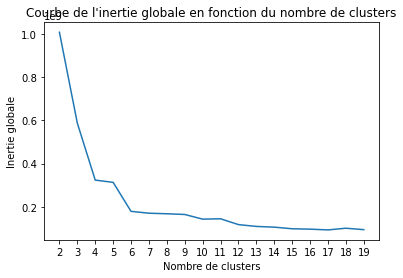

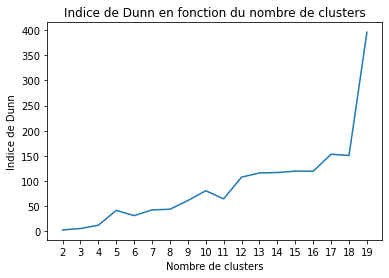

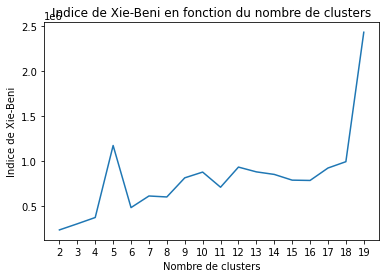

In [105]:
analyse_clusters(data_groupe, K_min = 2, K_max = 20, epsilon = 0.05)

On constate effectivement une baisse des deux indices pour k = 11 (ce qui correspond au nombre de groupe d'aliments différents).

In [136]:
centres, affectations = clust.kmoyennes(11, data_groupe, 0.00001, verbose = True)

Itération  1 : inertie = 491782880.530,  Différence = 491782879.530
Itération  2 : inertie = 431399387.434,  Différence = 60383493.096
Itération  3 : inertie = 403735295.803,  Différence = 27664091.631
Itération  4 : inertie = 388266415.785,  Différence = 15468880.018
Itération  5 : inertie = 295835898.517,  Différence = 92430517.268
Itération  6 : inertie = 267254443.878,  Différence = 28581454.640
Itération  7 : inertie = 234246022.803,  Différence = 33008421.075
Itération  8 : inertie = 209507975.544,  Différence = 24738047.259
Itération  9 : inertie = 205457041.126,  Différence = 4050934.418
Itération  10 : inertie = 198056450.335,  Différence = 7400590.790
Itération  11 : inertie = 190047083.617,  Différence = 8009366.719
Itération  12 : inertie = 178986816.380,  Différence = 11060267.237
Itération  13 : inertie = 170059455.614,  Différence = 8927360.765
Itération  14 : inertie = 162048174.099,  Différence = 8011281.516
Itération  15 : inertie = 152009343.046,  Différence = 100388

In [137]:
data_synthese.iloc[affectation[1]]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
3,11093,11093,aides culinaires et ingrédients divers,herbes,"Aneth, frais","Dill, fresh",2,0,Ambiant (long),LDPE,...,6.190000e-10,0.00811,0.000203,0.00405,0.0312,5.68,36.4,5.29,12.6,0.000005
21,11042,11042,aides culinaires et ingrédients divers,épices,"Cumin, graine","Cumin, seed",2,0,Ambiant (long),Verre,...,3.920000e-09,0.09580,0.001590,0.06990,0.5800,164.00,699.0,19.20,87.3,0.000129
26,11066,11066,aides culinaires et ingrédients divers,épices,"Fenouil, graine","Fennel, seed",2,0,Ambiant (long),Verre,...,5.630000e-10,0.00896,0.000164,0.00445,0.0212,24.10,16.0,1.21,16.1,0.000009
30,11007,11007,aides culinaires et ingrédients divers,ingrédients divers,"Gélatine, sèche","Gelatine, dried",2,0,Ambiant (long),Carton,...,1.430000e-09,0.03220,0.000299,0.00781,0.1390,26.70,97.4,1.17,22.9,0.000006
60,20987,20987,aides culinaires et ingrédients divers,algues,"Nori (Porphyra sp.), séchée ou déshydratée","Laver (Porphyra sp.), dried or dehydrated",2,0,Ambiant (long),LDPE,...,6.480000e-09,0.09970,0.001870,0.01330,0.1270,44.60,26.5,3.10,315.0,0.000088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887,21518,21518,"viandes, œufs, poissons",viandes cuites,"Agneau, gigot, grillé/poêlé","Lamb, leg, grilled/pan-fried",2,0,Glacé,PS,...,2.770000e-08,0.92000,0.003510,0.20000,4.0700,241.00,5580.0,16.40,139.0,0.000079
1889,21515,21515,"viandes, œufs, poissons",viandes crues,"Agneau, selle, crue","Lamb, saddle, raw",2,0,Glacé,PS,...,2.190000e-08,0.72800,0.002760,0.15900,3.2200,190.00,4410.0,12.90,107.0,0.000062
1899,8512,8512,"viandes, œufs, poissons",charcuteries,Andouille de Vire,Chitterling sausage from Vire,2,0,Glacé,PS,...,1.150000e-08,0.27600,0.002170,0.06490,1.1900,194.00,993.0,9.07,174.0,0.000053
1942,6122,6122,"viandes, œufs, poissons",viandes crues,"Boeuf, plat de côtes, cru","Beef, short ribs, raw",2,0,Glacé,PS,...,1.340000e-08,0.38400,0.001640,0.08680,1.6900,133.00,1950.0,6.02,74.8,0.000050


In [138]:
data_synthese.iloc[affectation[10]]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,code saison,code avion,Livraison,Matériau d'emballage,...,Effets toxicologiques sur la santé humaine : substances cancérogènes,Acidification terrestre et eaux douces,Eutrophisation eaux douces,Eutrophisation marine,Eutrophisation terrestre,Écotoxicité pour écosystèmes aquatiques d'eau douce,Utilisation du sol,Épuisement des ressources eau,Épuisement des ressources énergétiques,Épuisement des ressources minéraux
25,11092,11092,aides culinaires et ingrédients divers,herbes,"Estragon, frais","Tarragon, fresh",2,0,Ambiant (long),LDPE,...,5.360000e-10,0.007120,0.000172,0.003520,0.02730,4.82,32.00,4.660,11.00,0.000004
203,18904,18904,boissons,boissons sans alcool,"Boisson à base de riz, nature","Rice-based drink, plain",2,0,Ambiant (long),Carton,...,4.010000e-10,0.003660,0.000117,0.001670,0.01300,10.50,22.50,1.150,8.22,0.000004
232,18339,18339,boissons,boissons sans alcool,"Boisson plate aux fruits (10 à 50% de jus), su...","Fruit soft drink, still (10-50% of fruit juice...",2,0,Glacé,PET,...,3.440000e-10,0.006550,0.000099,0.002010,0.02530,4.03,11.50,0.800,12.50,0.000022
306,76023,76023,boissons,eaux,"Eau minérale Hydroxydase, embouteillée, gazeus...","Mineral sparkling water (Hydroxydase), bottled...",2,0,Ambiant (long),PET,...,1.230000e-10,0.000947,0.000066,0.000213,0.00189,1.03,1.82,0.174,6.13,0.000009
355,76058,76058,boissons,eaux,"Eau minérale Volvic active, embouteillée, gaze...","Mineral sparkling water (Volvic active), bottl...",2,0,Ambiant (long),PET,...,1.230000e-10,0.000947,0.000066,0.000213,0.00189,1.03,1.82,0.174,6.13,0.000009
371,2013,2013,boissons,boissons sans alcool,"Jus d'orange, maison","Orange juice, home-made",2,0,Glacé,Carton,...,6.900000e-10,0.009330,0.000206,0.004720,0.03750,31.90,47.00,2.190,13.60,0.000007
379,18041,18041,boissons,boissons sans alcool,Lait de coco ou Crème de coco,Coconut milk or coconut cream,2,0,Glacé,Carton,...,6.740000e-10,0.003320,0.000100,0.001900,0.01110,8.01,16.90,0.757,9.96,0.000003
403,18017,18017,boissons,boissons sans alcool,"Sirop à diluer, sucré","Syrup, with sugar (to be diluted)",2,0,Ambiant (long),Verre,...,6.780000e-10,0.015600,0.000186,0.004230,0.05420,12.40,31.80,2.750,14.70,0.000008
484,25571,25571,entrées et plats composés,plats composés,"Falafel ou Boulette de pois-chiche et/ou fève,...",Falafel,2,0,Glacé,PP,...,1.080000e-09,0.007450,0.000197,0.006180,0.02680,12.40,92.40,2.270,25.80,0.000007
630,25520,25520,entrées et plats composés,sandwichs,"Sandwich baguette, saucisson, beurre","Sandwich made with French bread, dry sausage a...",2,0,Glacé,LDPE,...,2.700000e-09,0.050700,0.000549,0.014900,0.21500,44.30,187.00,2.040,48.70,0.000013


L'algorithme Kppv n'a pas pu séparer nos données en classes de groupes d'aliments.

In [147]:
# Note : l'erreur est laissée là volontairement (juste pour observer la durée de chargement du clustering hierarchique).
clust.CHA(data_groupe.iloc[0:100], linkage = 'simple')

 44%|████████████████████████████████████▏                                             | 41/93 [00:03<00:03, 13.06it/s]


KeyboardInterrupt: 

Quant à l'algorithme CHA, il est beaucoup trop lent et est donc inutilisable.

### Apprentissage supervisé

In [155]:
dimension = X.shape[1]

#### KNN

In [174]:
nb_classes = np.unique(Y).size

In [175]:
df_knn_MC = analyse_knnMC(X, Y, nb_classes,  dimension, 20, 10)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:48<00:00, 10.82s/it]


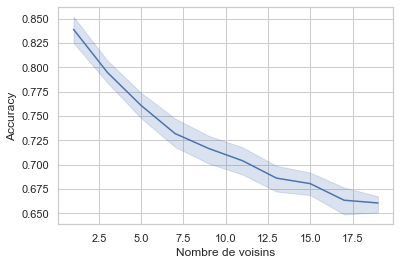

In [177]:
plot_perfs(df_knn_MC)

#### Arbre de décision

In [180]:
seuils = [0.1 + i * 0.1 for i in range(0, 10)]

In [182]:
df_arbre = analyse_arbre_numerique(X, Y, seuils, dimension, 3)

100%|█████████████████████████████████████████████████████████████████████████████████| 10/10 [40:28<00:00, 242.89s/it]


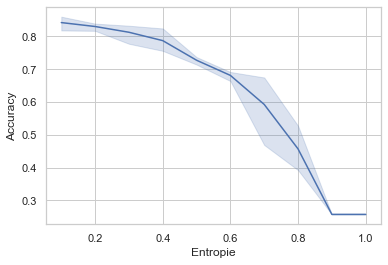

In [183]:
plot_perfs(df_arbre)

Les deux modèles sont équivalents en terme d'accuracy. Cependant le knn est plutôt rapide tandis que l'arbre de décision prend 4 min à s'entraîner.

### Application

In [189]:
knn = classif.ClassifierKNN_MC(dimension, 2, 11)
knn.train(X, Y)

In [212]:
randomIndex = np.random.randint(len(X))
exemple = X[randomIndex]
print("Exemple ", randomIndex, " choisi.")
print("Prédiction du knn : ", knn.predict(exemple))
print("Vrai groupe : ", Y[randomIndex])

Exemple  1762  choisi.
Prédiction du knn :  produits céréaliers
Vrai groupe :  produits céréaliers
